In [2]:
# Probability suffix trees > Syntax

## Load data

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install suffix_tree

/bin/bash: /home/h21/luas6629/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [4]:
from suffix_tree import Tree

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import librosa
from IPython.display import Audio
import numpy as np

from itertools import pairwise
import collections

import networkx as nx

import collections

In [6]:
#import automutualinformation
import pickle

context_dict = {
    0:'Unknown',
    1:'Separation',
    2:'Biting',
    3:'Feeding',
    4:'Fighting',
    5:'Grooming',
    6:'Isolation',
    7:'Kissing',
    8:'Landing',
    9:'Mating protest',
    10:'Threat-like',
    11:'General',
    12:'Sleeping',
}


def load_seq_data( dataset_descriptor, number_of_clusters):
    # Load The Sequences!
    with open(f'/data0/home/h21/luas6629/Thesis/classifiers_{dataset_descriptor}/symbolic_sequences_{dataset_descriptor}_{number_of_clusters}_symseq.pkl','rb') as f:
        #symbolic_sequences = pickle.load(f)
        symbolic_sequences = pd.read_pickle(f)
        
    # Load The Graph!
    with open(f'/data0/home/h21/luas6629/Thesis/classifiers_{dataset_descriptor}/graph_symbolic_sequences_{dataset_descriptor}_{number_of_clusters}_graphsymseq.pkl','rb') as f:
        #G = pickle.load(f)
        G = pd.read_pickle(f)

    # Load The Sequences!
    with open(f"/data0/home/h21/luas6629/Thesis/classifiers_{dataset_descriptor}/{dataset_descriptor}_{number_of_clusters}_map_complete.pkl",'rb') as f:
        #seq_mapped = pickle.load(f)
        seq_mapped = pd.read_pickle(f)
        seq_mapped.drop_duplicates(subset=["voc_segments_ix"], keep="first", inplace=True)
        seq_mapped.index = range(len(seq_mapped.index))
        seq_mapped.index.set_names('segmentID', inplace=True)
        
    return symbolic_sequences, G, seq_mapped
 

In [462]:
context_dict

{0: 'Unknown',
 1: 'Separation',
 2: 'Biting',
 3: 'Feeding',
 4: 'Fighting',
 5: 'Grooming',
 6: 'Isolation',
 7: 'Kissing',
 8: 'Landing',
 9: 'Mating protest',
 10: 'Threat-like',
 11: 'General',
 12: 'Sleeping'}

In [2027]:
# this will select the df corresponding to number of clusters 
NUM_CLUSTERS = 29

ID_DF = 'bat_215'

#symbolic_sequences_offspring, G_offspring, seq_mapped_offspring = load_seq_data( 'offspring_relationships', 372)
#symbolic_sequences_wildbats, G_wildbats, seq_mapped_wildbats = load_seq_data( 'wildbats_relationships', 175 )
symbolic_sequences, G, seq_mapped = load_seq_data( ID_DF, NUM_CLUSTERS )

In [8]:
symbolic_sequences['context'] = symbolic_sequences.label_context.apply(lambda x : collections.Counter(x).most_common()[0][0])

In [1985]:
symbolic_sequences.head(1)

,File name,Seq_Syllables,Seq_Syllables_ix,Pos_Segment,Duration,Folder,FileID,Emitter,label_addressee,label_context
0,121002204906205401.WAV,"[23, 6, 7]","[0, 1, 2]","[1, 2, 3]","[40070, 7905, 6862]",files201,58026,[216],"[0, 0, 0]","[6, 6, 6]"


In [442]:
specs_syllables_df = pd.read_pickle("/data0/home/h21/luas6629/Thesis/data/syllable_dfs/fruitbat_segmented/DB_Isolated_segs_no_outliers.pkl")  

In [1759]:
# using unique alphabet

ALPHABET = 'hdbscan_labels'
#ALPHABET = 'ms_labels'


all_sequences = pd.DataFrame()
all_sequences['Seq_Syllables'] = specs_syllables_df.groupby('key').apply(lambda x : x.sort_values(by = 'start_time')[ALPHABET].to_list())
all_sequences['context'] = specs_syllables_df.groupby('key').apply(lambda x : x.sort_values(by = 'start_time')['context'].to_list()[0])

context_dict_2ID = {v: k for k, v in context_dict.items()  }  
all_sequences['context_label'] = all_sequences['context']
all_sequences['context'] = all_sequences['context'].apply(lambda x : context_dict_2ID[x])

In [1336]:
all_sequences.head(10)

,Seq_Syllables,context,context_label
key,,,
120601002132055008,"[1, 3]",9,Mating protest
120601044742952687,"[3, 1]",3,Feeding
120601063000749337,"[1, 0, 0, 0, 3, 2]",4,Fighting
120601121832923352,"[5, 5, 5]",6,Isolation
120602185932558467,"[2, 1, 0, 1, 1, 0, 1]",3,Feeding
120602190130776471,"[0, 1, 2, 3]",3,Feeding
120602195022854569,"[0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2]",3,Feeding
120603001621888345,"[1, 6, 0, 1]",6,Isolation
120603153152881744,"[4, 4, 4]",6,Isolation


In [455]:
specs_syllables_df.head(1)

,start_time,end_time,indv,indvi,context,key,audio,rate,tf_specs,hdbscan_labels,ms_labels
0,0.169,0.184,0,0,Isolation,120709063505240110,"[0.0008475364, -0.0023444185, 0.004395896, -0....",250000,"[[0.0860133, 0.10490454, 0.07967993, 0.0, 0.02...",-1,4


In [10]:
seq_mapped.head(1)

,syllableID_qt_ward,syllableID_et_ward,commonSourceID,voc_segments,voc_segments_ix,voc_segments_duration,emitter,mfccs,mel_filtered,specs,...,temporal_stats,label_context,label_addressee,FileID,Folder,File name,Pos_segment,Start_seg,End_seg,Emitter
segmentID,,,,,,,,,,,,,,,,,,,,,
0,13,201,0,"[1.41432665e-05, -3.5728386e-05, 1.7758794e-05...","(61822.0, files201, 121004165931143478.WAV, 0,...",35952,215,"[[-740.9281, -738.7967, -738.887, -740.6574, -...","[[2.501173e-08, 6.530185e-08, 7.9928725e-08, 5...","[[1.5232453e-06, 6.4786386e-06, 3.016991e-06, ...",...,0.000277,6,217,61822.0,files201,121004165931143478.WAV,0,35795,71747,215


# Helpers

In [14]:
def plot_spec(spec , ax, path_to_save=''):
    S_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax = ax)
    if bool(path_to_save):
        
        plt.savefig(path_to_save,
            dpi =300,
            bbox_inches='tight')
                                   
                            
    plt.plot()
    
    


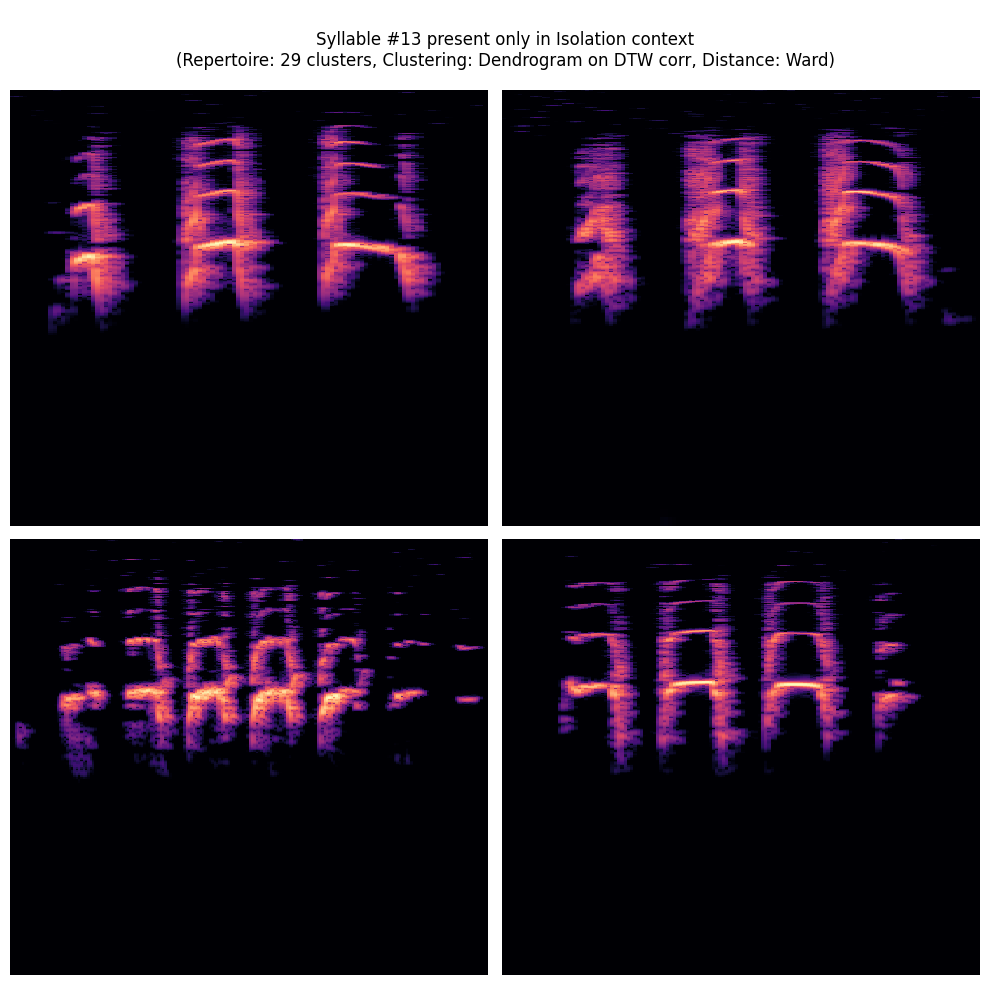

In [16]:
THRESHOLD_TYPE = 'qt_ward'
SELECTED_SYLLABLE_ID = 13
CONTEXT = 'Isolation'
GRID_SIZE = 4
NUM_CEL = int(np.sqrt(GRID_SIZE))

# SELECT THE CORRECT SEQUENCE COLUMN! ET_WARD OR QT_WARD
# TODO > change column name with num_cluster ?

images = seq_mapped[seq_mapped[f'syllableID_{THRESHOLD_TYPE}'] == SELECTED_SYLLABLE_ID]['specs'].sample(GRID_SIZE, replace=True).values


import matplotlib.pyplot as plt

# Create a figure and a grid of subplots
fig, axes = plt.subplots(NUM_CEL, NUM_CEL, figsize=(10, 10))

# Iterate over the subplots and plot the images
for i in range(NUM_CEL):
    for j in range(NUM_CEL):
        ax = axes[i, j]
        plot_spec( images[i*NUM_CEL + j] , ax)  # Replace `images` with your list of images
        ax.axis('off')  # Turn off axis labels

# Adjust spacing between subplots
plt.tight_layout()

fig.suptitle(f'''
    Syllable #{SELECTED_SYLLABLE_ID} present only in {CONTEXT} context
    (Repertoire: {NUM_CLUSTERS} clusters, Clustering: Dendrogram on DTW corr, Distance: Ward)
    ''')

plt.subplots_adjust(top=0.9)


#plt.savefig(f'/data0/home/h21/luas6629/Thesis/classifiers_{id_dir_classifiers}/{NUM_CLUSTERS}_clusters_syllable_{SELECTED_SYLLABLE_ID}_ONLY_in_{CONTEXT}_and_General.png',
#            dpi =300,
#            bbox_inches='tight')

# Show the plot
plt.show()


# PST

In [21]:
from scipy.stats import chi2_contingency

# Null_HP : there is equal population of syllables among contexts
# G-test : p_value < 0.05  => HP-0 rejected

def _1_gram(contexts : list):

    sample_dataset = symbolic_sequences.query(f'context in {contexts}').groupby("context").sample(n=100, replace = True)

    X = sample_dataset.Seq_Syllables.explode().to_list()
    #Y = sample_dataset.label_context.explode().to_list()
    Y = sample_dataset.label_addressee.explode().to_list()

    cm = pd.crosstab(index=X, columns=Y, margins=True)

    obs = cm.iloc[:-1, :-1]
    res = chi2_contingency(obs, lambda_="log-likelihood")
    return res.pvalue
    

contexts = [c for c in range(2,13) if c not in [8, 11, 12]]
_1_gram(contexts)

3.973620786565703e-216

In [22]:
# finding => context in sleeping clusters may be : biting (2), fighting (4), kissing? (7), Mating-protest? (10) , Generic ?(1)

In [23]:
# now test Bi-grams combinations (bi-grams)

import itertools
from scipy.stats import combine_pvalues

to_context = lambda x: x[0]

p_values = []

for _ in range(100):
    sample_dataset = symbolic_sequences.query(f'context not in [8, 11, 12]').groupby("context").sample(n=50, replace = True)

    X = sample_dataset.Seq_Syllables.apply(lambda x : list(itertools.pairwise(x))).explode().dropna().astype(str).to_list()
    Y = sample_dataset.label_context.apply(lambda x : list(itertools.pairwise(x))).explode().dropna().apply(to_context).to_list()

    cm = pd.crosstab(index=X, columns=Y, margins=True)

    obs = cm.iloc[:-1, :-1]
    res = chi2_contingency(obs, lambda_="log-likelihood")
    p_values.append( res.pvalue )
    
combine_pvalues(p_values, method='fisher', weights=None)

SignificanceResult(statistic=638.7544706501084, pvalue=2.585719093860235e-47)

In [24]:
# pairwise

contexts = [c for c in range(2,13) if c not in [8, 11, 12]]

for c1 in contexts:
    p_values = []
    for c2 in contexts:
        for _ in range(10):
            p_values.append( _1_gram([c1, c2]) )
        
        combined_p =  combine_pvalues(p_values, method='fisher', weights=None) 
        if combined_p.pvalue > 0.05:
            print(f'{context_dict[c1]}, {context_dict[c2]}, { combined_p }')

In [ ]:
tree = Tree({"A": [13, 13, 13], "B" : [13]})

In [44]:
tree.find([13])

True

In [27]:
tree  = Tree( symbolic_sequences.Seq_Syllables.to_dict() ) 

In [28]:
symbolic_sequences.Seq_Syllables.shape[0]

6079

In [29]:
print([ord(char) - 96 for char in ('Write Text').lower()])


[23, 18, 9, 20, 5, -64, 20, 5, 24, 20]


In [30]:
lengths = []
frequencies = []

for item in tree.maximal_repeats():
    C = item[0]
    path = item[1].__str__().split() # conver the path obj into a list
    print(C, path)
    lengths.extend( [len(path)])

    frequencies.extend([C])
    break

47 ['13']


### Plot MR 

In [468]:
# Tree of all vocalizations!!

#tree  = Tree( symbolic_sequences.Seq_Syllables.to_dict() ) 

tree  = Tree( all_sequences.Seq_Syllables.to_dict() ) 


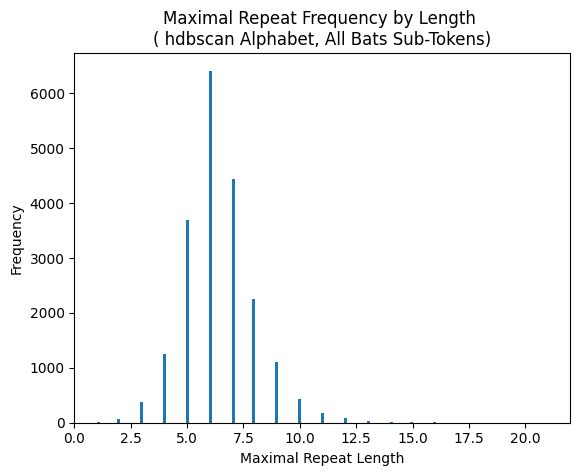

In [1833]:
import matplotlib.pyplot as plt

def plot_maximal_repeat_histogram(data, alphabeth):
    """
    input: tree.maximal_repeats() 
    C, path : https://cceh.github.io/suffix-tree/tree.html
    """
    
    lengths = []
    frequencies = []
    
    for item in data:
        C = item[0]
        path = item[1].__str__().split() # convert the path obj into a list
        
        # exclude noise:
        if '-1' in path:
            continue
        
        lengths.append( len(path))
        frequencies.append(C)
    
    plt.hist(lengths, bins='auto')
    plt.xlabel('Maximal Repeat Length')
    plt.ylabel('Frequency')
    plt.title(f'Maximal Repeat Frequency by Length \n( {alphabeth} Alphabet, All Bats Sub-Tokens)')
    plt.show()
    
    return lengths
    
    
    


lengths = plot_maximal_repeat_histogram(tree.maximal_repeats(), 'hdbscan')

In [1842]:
lengths[:10], mr[:10]

([1, 2, 3, 4, 5, 6, 6, 7, 9, 6],
 [('5',),
  ('5', '2'),
  ('5', '2', '0'),
  ('5', '2', '0', '3'),
  ('5', '2', '0', '3', '0'),
  ('5', '2', '0', '3', '0', '5'),
  ('5', '2', '0', '3', '0', '0'),
  ('5', '2', '0', '3', '0', '0', '5'),
  ('5', '2', '0', '3', '0', '0', '5', '5', '0'),
  ('5', '2', '0', '3', '0', '3')])

In [1840]:
pd.Series(lengths).describe()

count    20378.000000
mean         6.410884
std          1.620504
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         21.000000
dtype: float64

In [1838]:
mr = []
for item in tree.maximal_repeats():
    C = item[0]
    path = item[1].__str__().split() # convert the path obj into a list

    # exclude noise:
    if '-1' in path:
        continue
    
    mr.append(tuple(path))

In [1841]:
pd.Series(mr).apply(len).describe()

count    20378.000000
mean         6.410884
std          1.620504
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         21.000000
dtype: float64

In [471]:
from sklearn.cluster import KMeans

def identify_clusters(data, n_clusters):
    lengths = []
    frequencies = []
    
    for item in data:
        
        C = item[0]
        path = item[1].__str__().split() # convert the path obj into a list
        
        lengths.append( len(path))
        frequencies.append(C)
    
    X = list(zip(lengths, frequencies))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    cluster_labels = kmeans.labels_
    
    return cluster_labels

np.unique(identify_clusters(tree.maximal_repeats(), 10))

/home/h21/luas6629/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [155]:
lengths = []
paths = []
frequencies = []

tree = Tree( symbolic_sequences.query(f'context in [6]').Seq_Syllables.to_dict() ) 

for item in tree.maximal_repeats():

    C = item[0]
    path = item[1].__str__().split() # convert the path obj into a list

    lengths.append( len(path))
    frequencies.append(C)
    paths.append(path)

#X = list(zip(lengths, frequencies))
X = list(zip(paths, frequencies))

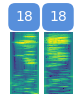

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage
import numpy as np

def vocal_units_palette (labels ):
    
    # Create a color palette
    unique_labels = np.unique(labels)
    palette = sns.hls_palette(len(unique_labels))
    color_dict = dict(zip(unique_labels, palette))
    return color_dict

def plot_spectrograms(spectrograms, labels, n_rows, n_cols, new_shape = (64, 32), color_dict = vocal_units_palette (np.arange(1, 30, 1 )), title=''):
    
    
    # Calculate total figure size
    fig_width = n_cols * new_shape[1] / 80  # 80 is a conversion factor from pixels to inches
    fig_height = n_rows * new_shape[0] / 80

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    axes = axes.ravel()
    
    for i in range(len(spectrograms)):
        # Compute zoom factors
        y_zoom = new_shape[0] / spectrograms[i].shape[0]
        x_zoom = new_shape[1] / spectrograms[i].shape[1]

        # Resize spectrogram
        resized_spec = scipy.ndimage.zoom(spectrograms[i], (y_zoom, x_zoom))

        
        axes[i].matshow(np.log(resized_spec ** 2),aspect='auto')
        axes[i].axis('off') # to remove axes for clarity
        
        # Add colored label
        axes[i].text(0.5, 1.25, labels[i], transform=axes[i].transAxes, 
                 fontsize=10, va='center', ha='center', 
                 color='white', bbox=dict(facecolor=color_dict[labels[i]], edgecolor='none', boxstyle='round, pad=0.5'))

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    #title
    fig.suptitle(f'{title}', verticalalignment = 'bottom', horizontalalignment = 'center', y =-0.25, fontsize = 8)

    plt.tight_layout
    
plot_spectrograms(seq_mapped.query(f'syllableID_qt_ward in [{18}]')['specs'].sample(n=2).values, [18, 18], 1, 2)

In [ ]:
seq

In [224]:
def plot_sequence(seq, title = ''):
    
    specs = []
    for v in seq:
        specs.append (  seq_mapped.query(f'syllableID_qt_ward in [{v}]')['specs'].sample().values[0] )
        
    labels = list(map(int, seq))
    
    assert len(labels) == len(specs)
    
    plot_spectrograms(specs, labels, n_rows=1, n_cols=len(seq), new_shape = (64, 48), title = title)
 

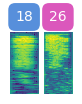

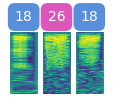

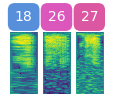

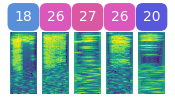

In [130]:
for i, p in enumerate(paths):
    if len(p) < 2:
        continue
    
    plot_sequence(p)
    
    if i >3:
        break
        

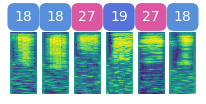

In [143]:
plot_sequence(['18', '18', '27', '19', '27', '18'])

In [133]:
def is_sublist(test_list, sublist):
    return any(sublist == list(x) for x in zip(*[test_list[i:] for i in range(len(sublist))]))
 

In [182]:
paths

{}

/tmp/ipykernel_2744041/1188127084.py:33: RuntimeWarning: divide by zero encountered in log
  axes[i].matshow(np.log(resized_spec ** 2),aspect='auto')


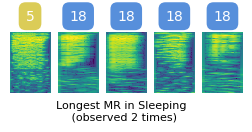

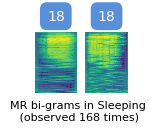

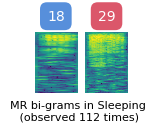

In [247]:
contextID = 12

tree = Tree( symbolic_sequences.query(f'context in [{contextID}]').Seq_Syllables.to_dict() ) 


paths = {}
paths_list = []
#lengths = []
frequencies = []
for item in tree.maximal_repeats():

    C = item[0]
    path = item[1].__str__().split() # convert the path obj into a list

    #print(path, C)
    #lengths.append( len(path))
    frequencies.append(C)
    paths_list.append(path)
    
    paths.update({tuple(path): C})

#X = list(zip(lengths, frequencies))
#X = list(zip(paths, frequencies))


# longest maximal repetition in a given context (check which data you fed to get X!!)
for seq, freq in sorted(paths.items(), key=lambda x: (-len(x[0]), -x[1]))[:1]:
    plot_sequence(seq, f'Longest MR in {context_dict[contextID]} \n (observed { freq  } times)')
    
    
# most frequent maximal repetition bi-grams in a given context (check which data you fed to get X!!)
bi_grams = list(filter(lambda x: len(x[0]) == 2, paths.items()))

for seq, freq in sorted(bi_grams, key=lambda x: ( -x[1], -len(x[0]),))[:2]:
    plot_sequence(seq, f'MR bi-grams in {context_dict[contextID]} \n (observed { freq  } times) ')

/tmp/ipykernel_2744041/1188127084.py:33: RuntimeWarning: divide by zero encountered in log
  axes[i].matshow(np.log(resized_spec ** 2),aspect='auto')


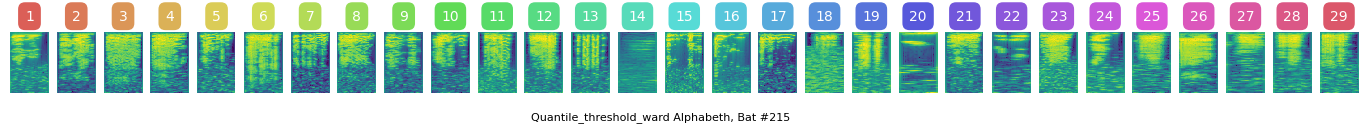

In [248]:
plot_sequence(np.arange(1, 30, 1), f'Quantile_threshold_ward Alphabeth, Bat #215 ')

In [193]:
del X

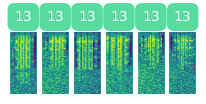

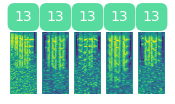

In [157]:
# most frequent maximal repetition in a given context (check which data you fed to get X!!)
for seq, freq in sorted(X, key=lambda x: (-len(x[0]), -x[1]))[:2]:
    plot_sequence(seq)

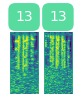

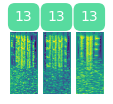

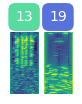

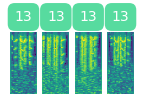

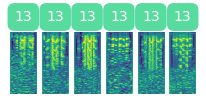

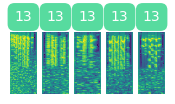

In [158]:
# most frequent syllables
i = 0
for seq, freq in sorted(X, key=lambda x: (-x[1], -len(x[0]))):
    if len(seq) < 2:
        continue
    if i < 6:
        plot_sequence(seq)
        i += 1
    else:
        break

In [2000]:
is_sublist([2, 3, 4, 8], [2,3])

True

In [895]:
symbolic_sequences.groupby('context').size()

context
2      292
3       96
4       50
5       48
6       78
7       48
8        1
9      629
10      46
11     627
12    4164
dtype: int64

### Functions

In [1939]:
### max_repetition_by_context




def max_repetition_by_context(context, df):
    
    data  = df.query(f'context in [{context}]')
    
    if data.shape[0] < 50:
        print('less than 50 samples')
        raise
        
    tree  = Tree( data.Seq_Syllables.to_dict() ) 


    data = []
    for C, path in sorted(tree.maximal_repeats()):
        # print(C, path.__str__().split())
        #data.append((C, tuple(map(int, path.__str__().split()))))
        
        for i in range(C):

            data.append( tuple(map(int, path.__str__().split())) )
        #data.append( tuple(map(int, path.__str__().split())))
        
    return data
    
    
def max_repetition_all_context(df):
    
    data  = df
    
    if data.shape[0] < 50:
        print('less than 50 samples')
        raise
        
    tree  = Tree( data.Seq_Syllables.to_dict() ) 


    data = []
    for C, path in sorted(tree.maximal_repeats()):
        # print(C, path.__str__().split())
        #data.append((C, tuple(map(int, path.__str__().split()))))
        
        for i in range(C):

            data.append( tuple(map(int, path.__str__().split())) )
        #data.append( tuple(map(int, path.__str__().split())))
        
    return data

mr = list(filter(lambda x : x, max_repetition_all_context(all_sequences)))

In [1940]:
tmp = pd.DataFrame()
tmp['mr'] = pd.Series(mr)
tmp['length'] = pd.Series(mr).apply(len)

In [1941]:
x, y = zip(*Counter(pd.Series(mr).apply(len)).items())

In [1942]:
x

(16, 19, 18, 14, 21, 9, 12, 6, 10, 13, 8, 7, 5, 17, 20, 11, 15, 4, 3, 2, 1)

Text(0.5, 0, 'Maximal Repetitions Length')

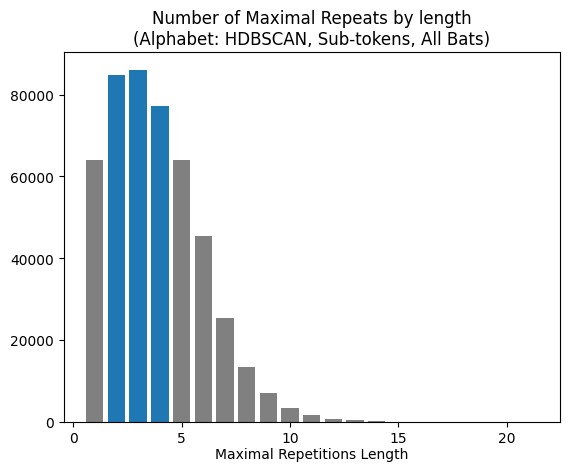

In [1943]:
clrs = ['tab:blue' if (i > 1 and i < 5) else 'grey' for i in x ]
plt.bar(x, y, color=clrs)
plt.title( 'Number of Maximal Repeats by length\n(Alphabet: HDBSCAN, Sub-tokens, All Bats)')
plt.xlabel('Maximal Repetitions Length', labelpad=1)

In [1944]:
tmp.describe()

,length
count,473597.000000
mean,3.825318
std,2.146844
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,21.000000


In [1899]:
tmp['length'].max(), all_sequences.Seq_Syllables.apply(len).max()

(21, 157)

<Axes: >

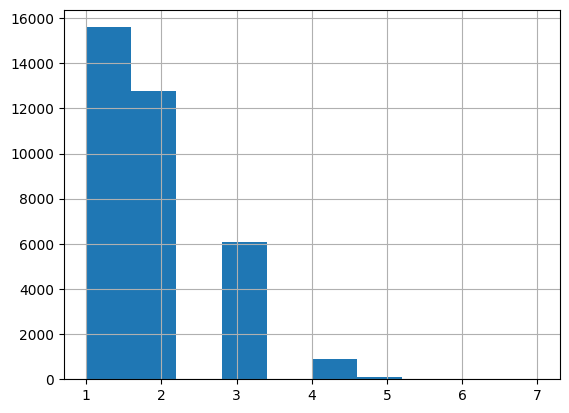

In [1853]:
pd.Series(mr).apply(len).hist()

In [1945]:
pd.Series(mr).apply(len).describe()

count    473597.000000
mean          3.825318
std           2.146844
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max          21.000000
dtype: float64

In [473]:
for c in context_dict.keys():
    print(len(max_repetition_by_context(c, symbolic_sequences)))

less than 50 samples


RuntimeError: No active exception to reraise

In [350]:
max_reps_flat = [item for sublist in max_repetition_by_context(6) for item in sublist]
proportion_13(max_reps_flat)

0.759493670886076

In [371]:
len(max_repetitions)

111

In [604]:
context_dict

{0: 'Unknown',
 1: 'Separation',
 2: 'Biting',
 3: 'Feeding',
 4: 'Fighting',
 5: 'Grooming',
 6: 'Isolation',
 7: 'Kissing',
 8: 'Landing',
 9: 'Mating protest',
 10: 'Threat-like',
 11: 'General',
 12: 'Sleeping'}

In [653]:
max_repetitions =  list(filter(lambda x : 1 < len(x) <= 7 and collections.Counter(x).most_common()[0][0] != -1, max_repetition_by_context(6, DF_SEQUENCES))) 
len(max_repetitions)

29

In [654]:
max_repetitions

[(13, 13, 13, 13, 13),
 (13, 13, 13, 13, 13, 13),
 (13, 13, 13, 13),
 (13, 13, 13, 13),
 (13, 19),
 (13, 19),
 (13, 19),
 (13, 13, 13),
 (13, 13, 13),
 (13, 13, 13),
 (13, 13, 13),
 (13, 13, 13),
 (13, 13, 13),
 (13, 13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13),
 (13, 13)]

In [681]:
max_repetitions =  list(filter(lambda x : 1 < len(x) <= 7 and (-1 not in x), max_repetition_by_context(3, DF_SEQUENCES))) 
len(max_repetitions)
0.89

0.89

In [682]:
max_repetitions

[(3, 2),
 (3, 2),
 (9, 3),
 (9, 3),
 (12, 12),
 (12, 12),
 (18, 2),
 (18, 2),
 (18, 18),
 (18, 18),
 (18, 24),
 (18, 24),
 (22, 20),
 (22, 20),
 (24, 29),
 (24, 29),
 (27, 18),
 (27, 18),
 (29, 18),
 (29, 18),
 (3, 3),
 (3, 3),
 (3, 3),
 (18, 20),
 (18, 20),
 (18, 20)]

In [572]:
tmp = pd.DataFrame(np.array(max_repetitions[:20]))
tmp['length'] = tmp[0].apply(lambda x : len(x))
tmp['weight'] = tmp['length'].apply(lambda x : tmp.groupby('length').size().loc[x] / tmp.shape[0])

tmp.groupby('length').sample(frac=.3, replace=True, random_state = 0, weights = tmp['weight'])[0].to_list()

/tmp/ipykernel_2744041/36440998.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = pd.DataFrame(np.array(max_repetitions[:20]))


[(-1, 6, 6),
 (0, -1, 5, 2),
 (0, -1, 5, 2),
 (-1, 5, 0, 5),
 (2, 2, 2, 2, 2, 2),
 (0, 0, 0, 0, 0, 0, 0)]

In [631]:
repetitions = [x for x in max_repetitions if np.unique(x).shape[0] == 1]

In [655]:
combinations = [x for x in max_repetitions if np.unique(x).shape[0] != 1]
combinations

[(13, 19), (13, 19), (13, 19)]

In [658]:
for mr in combinations:
    
    #print(mr)
    
    # create a shuffled version of the MR
    #shuffled_mr = list(mr)  # make a copy
    #random.shuffle(shuffled_mr)
    #shuffled_mr = tuple(shuffled_mr)  # convert back to tuple for comparison
    
    # check how often this shuffled version exists in the dataset
    #count = Counter(max_repetitions)[shuffled_mr]
    
    count = 0
  
    for perm in itertools.permutations(mr):

        count = Counter(combinations)[perm]

        isPermuted.append(count)

    if count == 0:
        no_shuffled_counterparts += 1

In [659]:
no_shuffled_counterparts

6

## Here

2321
150 out of 697 MRs do not have shuffled counterparts. 
      Ratio: 0.2152080344332855 
117 repetitions out of 697 MRs.
    Ratio: 0.1678622668579627 


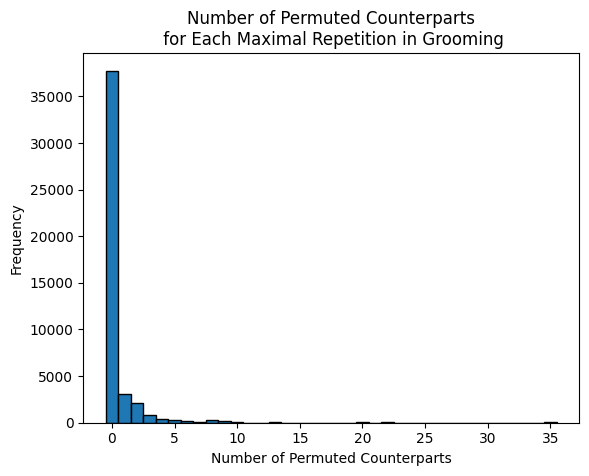

CPU times: user 3.76 s, sys: 196 ms, total: 3.96 s
Wall time: 3.73 s


In [722]:
%%time

import random
import itertools

CONTEXT_ID = 5
DF_SEQUENCES = all_sequences

no_shuffled_counterparts = 0
isPermuted = []


# filter out monosyllables and sequences having majority of syllables from noisy data points, i.e. cluster -1:
#max_repetitions =  list(filter(lambda x : 1 < len(x) <= 7 and collections.Counter(x).most_common()[0][0] != -1, max_repetition_by_context(CONTEXT_ID, DF_SEQUENCES))) 

# just exclude the -1 cluster, or skews repetitions results (no repetitions because there is -1)
max_repetitions =  list(filter(lambda x : 1 < len(x) <= 7 and (-1 not in x), max_repetition_by_context(CONTEXT_ID, DF_SEQUENCES))) 
print(len(max_repetitions))


# or use just samples, to speed up


tmp = pd.DataFrame()
tmp['MR'] = pd.Series([list(i) for i in max_repetitions])
tmp['length'] = tmp['MR'].apply(lambda x : len(x))
tmp['weight'] = tmp['length'].apply(lambda x : tmp.groupby('length').size().loc[x] / tmp.shape[0])

tmp = tmp.groupby('length').sample(frac = .3, replace=True, random_state = 0, weights = tmp['weight'])

if tmp.shape[0] > 3000:
    tmp = tmp.sample(n = 3000)

max_repetitions = tmp['MR'].to_list()


# take out the repetitions:
repetitions = [tuple(x) for x in max_repetitions if np.unique(x).shape[0] == 1]
combinations = [tuple(x) for x in max_repetitions if np.unique(x).shape[0] != 1]
#print(combinations)

for mr in combinations:
    
    #print(mr)
    
    # create a shuffled version of the MR
    #shuffled_mr = list(mr)  # make a copy
    #random.shuffle(shuffled_mr)
    #shuffled_mr = tuple(shuffled_mr)  # convert back to tuple for comparison
    
    # check how often this shuffled version exists in the dataset
    #count = Counter(max_repetitions)[shuffled_mr]
    
    count = 0
  
    for perm in itertools.permutations(mr):

        count = Counter(combinations)[perm]

        isPermuted.append(count)

    if count == 0:
        no_shuffled_counterparts += 1
        

# print out the number of MRs that do not have shuffled counterparts
print(f'''{no_shuffled_counterparts} out of {len(max_repetitions)} MRs do not have shuffled counterparts. 
      Ratio: {no_shuffled_counterparts /len(max_repetitions) } ''')

print(f'''{len(repetitions)} repetitions out of {len(max_repetitions)} MRs.
    Ratio: {len(repetitions) /len(max_repetitions) } ''')

# plot the histogram
plt.hist(isPermuted, bins=np.arange(0, max(isPermuted) + 2) - 0.5, edgecolor='black')
plt.xlabel('Number of Permuted Counterparts')
plt.ylabel('Frequency')
plt.title(f'Number of Permuted Counterparts\n for Each Maximal Repetition in {context_dict[CONTEXT_ID]}')
plt.show()

In [785]:
# check distribution of MR subsequences between contexts:

for c1 in [2, 3, 4, 5, 6, 7, 9, 10]:
    mr_1 = list(filter(lambda x : 1 < len(x) <= 7 and (-1 not in x), max_repetition_by_context(c1, DF_SEQUENCES)))
    mr_1 = [tuple(x) for x in mr_1]
    for c2 in [2, 3, 4, 5, 6, 7, 9, 10]:
        mr_2 = list(filter(lambda x : 1 < len(x) <= 7 and (-1 not in x), max_repetition_by_context(c2, DF_SEQUENCES)))
        mr_2 = [tuple(x) for x in mr_2]
        print(f'Context {c1}, {c2} {len( set(mr_1).intersection(set(mr_2)) )  / len( set(mr_1).union(set(mr_2)) )} ')

Context 2, 2 1.0 
Context 2, 3 0.3350189633375474 
Context 2, 4 0.09630989180834622 
Context 2, 5 0.23308957952468007 
Context 2, 6 0.14864864864864866 
Context 2, 7 0.152317880794702 
Context 2, 9 0.20059401416495318 
Context 2, 10 0.36610169491525424 
Context 3, 2 0.3350189633375474 
Context 3, 3 1.0 
Context 3, 4 0.18538630084786129 
Context 3, 5 0.13627906976744186 
Context 3, 6 0.12967765839199705 
Context 3, 7 0.0813844714686623 
Context 3, 9 0.3352260778128286 
Context 3, 10 0.36229635376260666 
Context 4, 2 0.09630989180834622 
Context 4, 3 0.18538630084786129 
Context 4, 4 1.0 
Context 4, 5 0.03005623424471592 
Context 4, 6 0.04650079209766098 
Context 4, 7 0.017355051386465 
Context 4, 9 0.3053633995148684 
Context 4, 10 0.12508419128259404 
Context 5, 2 0.23308957952468007 
Context 5, 3 0.13627906976744186 
Context 5, 4 0.03005623424471592 
Context 5, 5 1.0 
Context 5, 6 0.16037735849056603 
Context 5, 7 0.33967391304347827 
Context 5, 9 0.07066887260694871 
Context 5, 10 0.

## Power Law fitting tests

- https://groups.google.com/g/powerlaw-general/c/rTjEbQlHZVU
- https://github.com/keflavich/plfit/blob/master/plfit/plfit.py
- https://github.com/jeffalstott/powerlaw
- https://arxiv.org/pdf/0706.1062.pdf

In [1396]:
#check distribution of n-grams in MR, common to all contexts:

DF_SEQUENCES = all_sequences # contexts : [2, 3, 4,  6, 9]
#DF_SEQUENCES = symbolic_sequences # contexts: [2, 3, 4,  6, 9]

all_mr = []

for c in [2, 3, 4, 5, 6, 7, 9, 10]:
#for c in [4]:
    # and what if I retain the monosyllables ???
    all_mr.extend( list(filter(lambda x : len(x) <= 7 and (-1 not in x), max_repetition_by_context(c, DF_SEQUENCES)) ) ) 

In [1376]:
x, y  = map(list, zip(*Counter(all_mr).most_common()))

In [1377]:
y[0], y[-1], x[-1]

(14928, 1, (0, 5, 3, 1, 0))

In [1378]:
# filter out extremely rare vocalizations 

np.sum(y) / 10000

38.0086

In [1361]:
len(list(filter(lambda x : x > 1, y)))

11304

In [1362]:
len(y), np.sum(y)

(11311, 181779)

In [1134]:
319335/1000

319.335

In [1150]:
len(y)

11744

In [1412]:
# test on ward alphabet
x, y  = map(list, zip(*Counter(Counter(symbolic_sequences.Seq_Syllables.explode().to_list())).most_common()))
len(y), np.sum(y)

(29, 19549)

In [1435]:
# test on ms alphabet
x, y  = map(list, zip(*Counter(Counter(all_sequences.Seq_Syllables.explode().to_list())).most_common()))
len(y), np.sum(y)

(11, 152578)

In [1459]:
# test on  hdbscan alphabet
x, y  = map(list, zip(*Counter(Counter(all_sequences.Seq_Syllables.explode().to_list())).most_common()))

# exclude -1 syllables if hdbscan
y = y[:x.index(-1)] + y[x.index(-1) + 1:]
x = x[:x.index(-1)] + x[x.index(-1) + 1:]
len(y), np.sum(y)

(8, 136433)

In [1460]:
import powerlaw

data = list(filter(lambda x : x > 1, y))

parameter_range = {'alpha': [1.5, None], 'sigma': [None, .2]}

fit = powerlaw.Fit(data, discrete=True, estimate_discrete=True)  # y is your data
print(fit.alpha)  # This is the exponent of the power-law distribution
print(fit.xmin)  # This is the minimum value from which the power-law behavior starts


fit.xmin
fit.power_law.D
fit.fixed_xmax
fit.power_law.parameter1_name
fit.noise_flag




Calculating best minimal value for power law fit
2.0513510308853795
5790.0


False

Using HDBSCAN, all bats: 
1. filtering out 1/10000 rare MR events  => 
- fit.alpha, fit.sigma, fit.xmin :(1.9214915014619844, 0.028492167708228634, 35.0) 
- PL VS exponential: (7.658729966434342, 1.8778075486520733e-14)
- PL VS lognormal: (-0.5594524503644779, 0.5758529739392828)
- PL VS truncated: (-1.8920415163365507, 0.04594733506804938) (Assuming nested distributions)
- lognormal VS truncated : (-2.705680762967717, 0.006816453885560907)

2. all events > 1:
- fit.alpha, fit.sigma, fit.xmin : (1.7933268076237847, 0.010051779762799756, 4.0)
- (12.650692076985136, 1.1089363878992436e-36)
- (-0.8632226947099065, 0.3880150381199742)
- (-2.111408599979737, 0.020704694024752168)
- (-2.2598075831149664, 0.023833195569455037)

3. all events > 1/1000 rare events:
- fit.alpha, fit.sigma, fit.xmin : (2.2805588352488906, 0.19998969062051097, 1226.0)
- (1.539466076847047, 0.12369055341572495)

=> composed exp & power law ?

If only context 6 (> 2.5):
- (1.8882033718965396, 0.06752885188772195, 17.0)
- does not exclude power law or log normal

If only context 2, 9, 10:
-(1.9356437678410863, 0.03661457003149034, 3.0) 
- does not exclude power law, log normal, or truncated power law

If only context 3:
- (1.864071055057262, 0.022699446340687567, 3.0)
- does not exclude power law, log normal, or truncated power law

If only 4 (> 18)
- (1.984064218612117, 0.029536698601598826, 19.0)



-----

If using MS ALphabet:
truncated power law, lower alpha:
- context 6 : (1.7727988073571859, 0.025533991315556906, 7.0)
- context 4:  (1.97979804507507, 0.029515202781286186, 19.0)
- all:(-1.4046801053007016, 0.16011642428992778)
-  LN VS TPL (-1.4046801053007016, 0.16011642428992778)


-----

qt_ward Alphabet:
- (3.01727080478346, 0.46279366209505624, 494.0)
- cannot say anything about the fat tail (p_values > 0.1) . but good-of-fit p_value = 0.11 (simulation)

-----
ms_ Alphabet (All):
- (2.2635771598064407, 0.4775872753127374, 7885.0)
- cannot say anything about the fat tail (p_values > 0.1) . but good-of-fit p_value = 0.0685 (simulation)

hdbscan Alphabet (All):
- (2.0513510308853795, 0.39737333833630023, 5790.0)
- cannot say anything about the fat tail (p_values > 0.1) . but good-of-fit p_value = 0.42 (simulation)

In [1461]:
fit.alpha, fit.sigma, fit.xmin

(2.0513510308853795, 0.39737333833630023, 5790.0)

In [1462]:
fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

(-0.44746878613733837, 0.6545366201708736)

In [1432]:
simulated_data = fit.power_law.generate_random(100)
fit_sim = powerlaw.Fit(simulated_data, fit_method='KS', verbose = False )
fit_sim.power_law.xmin, fit.power_law.alpha

(494.10813125274393, 3.02140013321078)

In [868]:
fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [1463]:
fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

(-0.44746878613733837, 0.6545366201708736)

In [1464]:
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.xmin)
fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)

Calculating best minimal value for power law fit
2.0514464960918457
5790.0


(-0.5944819932634533, 0.5521897824159457)

In [1465]:
fit.distribution_compare('exponential', 'lognormal', normalized_ratio=True)

(0.19078230912295277, 0.8486961493790695)

In [1466]:
fit.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions


(-0.9050694444079562, 0.24502190525739043)

In [1467]:
fit.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)

(-1.021950389999531, 0.30680438124169007)

In [915]:
fit.power_law.KS(), fit_sim.power_law.KS()

(0.011474026093933332, 0.009928814238665207)

In [1468]:
%%time


# test p_Value by simulations

#data = y[:-5]

fit = powerlaw.Fit(data, fit_method='KS')  # Fit your real data

ks_real = fit.power_law.KS()  # Calculate KS statistic for the real data

n = 10000  # Number of synthetic data sets to generate
ks_synthetic = np.zeros(n)  # Store KS values for the synthetic data sets

for i in range(n):
    simulated_data = fit.power_law.generate_random(len(data))  # Generate synthetic data from the fitted power law
    fit_sim = powerlaw.Fit(simulated_data, fit_method='KS', verbose=False)  # Fit the synthetic data
    ks_synthetic[i] = fit_sim.power_law.KS()  # Calculate KS statistic for the synthetic data

p_value = np.sum(ks_synthetic > ks_real) / n  # Calculate p-value

Calculating best minimal value for power law fit
CPU times: user 14.3 s, sys: 139 ms, total: 14.4 s
Wall time: 14.3 s


In [1470]:
p_value

0.4266

Calculating best minimal value for power law fit


Text(0.5, 1.0, 'Probability density function (logarithmic binning)')

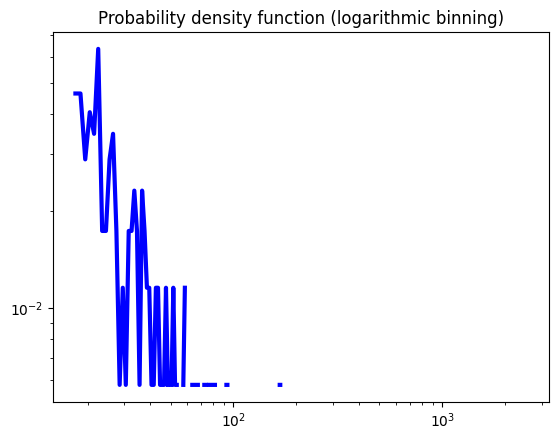

In [1224]:
# Probability density function (logarithmic binning)
#data = y

fit = powerlaw.Fit(data, fit_method='likelihood', )  # Fit your real data

fig, ax = plt.subplots(1,1)
fit.plot_pdf(ax= ax, linewidth=3, color='b',linear_bins=True)
ax.set_title('Probability density function (logarithmic binning)')

Text(0.5, 1.0, 'Probability density function (logarithmic binning)')

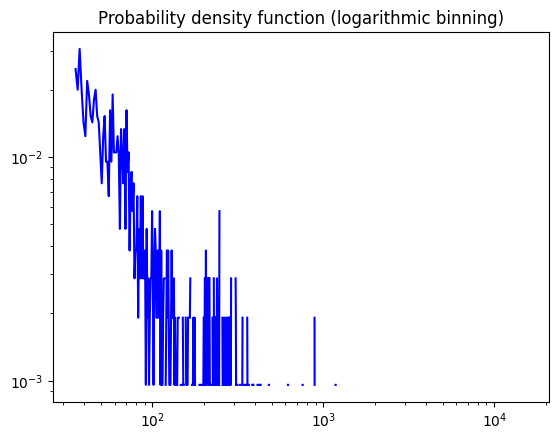

In [1184]:
ax = powerlaw.plot_pdf(data, color='b', linear_bins=True)
ax.set_title('Probability density function (logarithmic binning)')

In [1085]:
data[-5:]

[1, 1, 1, 1, 1]

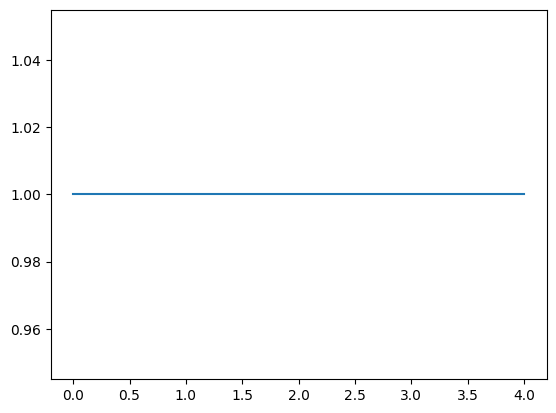

In [1084]:
plt.plot(data[-5:])

In [857]:
#powerlaw.plot_pdf(y[:-1000], linear_bins=True, color='b');

In [1045]:
fit.sigma

0.010051779762799756

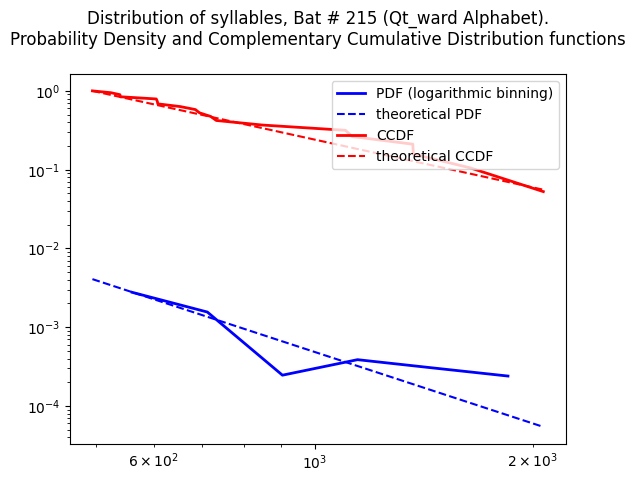

In [1426]:
fig_1 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--',  ax = fig_1)
fit.plot_ccdf(color='r', linewidth=2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax = fig_1)
fig_1.set_title(f'''Distribution of syllables, Bat # 215 (Qt_ward Alphabet).
Probability Density and Complementary Cumulative Distribution functions
    ''')
fig_1.legend(['PDF (logarithmic binning)', 'theoretical PDF', 'CCDF', 'theoretical CCDF'], loc='upper right')

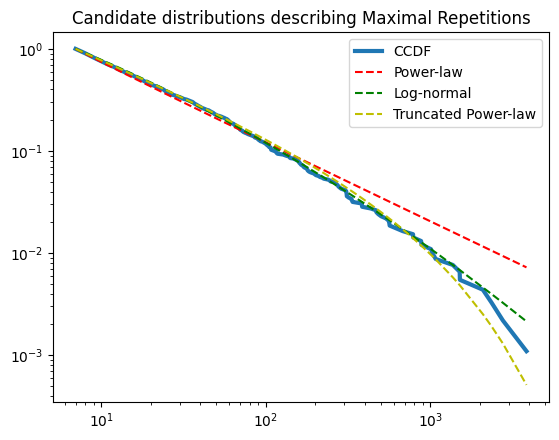

In [1355]:
#fit = powerlaw.Fit(data, discrete=True, estimate_discrete=True, parameter_range = parameter_range)  # y is your data


fig_2 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax = fig_2, color='r', linestyle='--')
fit.lognormal.plot_ccdf(ax = fig_2, color='g', linestyle='--')
fit.truncated_power_law.plot_ccdf(ax = fig_2, color='y', linestyle='--')

fig_2.set_title(f'''Candidate distributions describing Maximal Repetitions''')
fig_2.legend(['CCDF', 'Power-law', 'Log-normal', 'Truncated Power-law'], loc='upper right')

Calculating best minimal value for power law fit


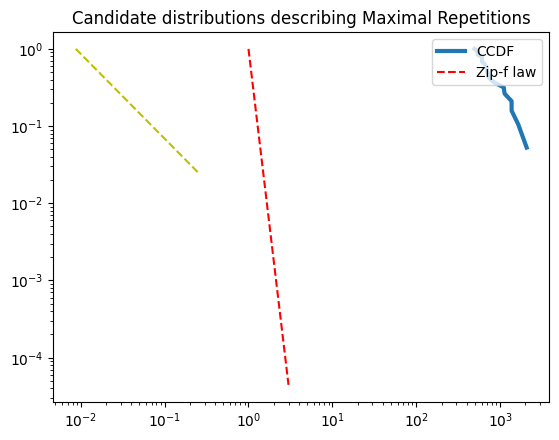

In [1424]:
# If fitted to Zipf law
parameter_range = {'alpha': [0., 1.5]}

fit = powerlaw.Fit(
    data, 
    discrete=True, 
    estimate_discrete=True)
    #parameter_range = parameter_range)  # y is your data


fig_3 = fit.plot_ccdf(linewidth=3)
#fit.power_law.plot_ccdf(ax = fig_3, color='r', linestyle='--')
zip_fit.power_law.plot_ccdf(ax = fig_3, color='r', linestyle='--')
zip_fit_2.power_law.plot_ccdf(ax = fig_3, color='y', linestyle='--')
fig_3.set_title(f'''Candidate distributions describing Maximal Repetitions''')
fig_3.legend(['CCDF', 'Zip-f law'], loc='upper right')



In [1023]:
fit.alpha, fit.sigma, fit.xmin

(1.7933268076237847, 0.010051779762799756, 4.0)

In [1038]:
def zipf (r, R):
    
    # https://mathworld.wolfram.com/ZipfsLaw.html
    # r => rank
    # R => number of different MR (words)
    
    return 1/(r * np.log(1.78 * R))

In [1421]:
s = np.array([zipf(rank + 1, len(data)) for rank, _ in enumerate(data)])
zip_fit_2 = powerlaw.Fit(s)

Calculating best minimal value for power law fit


In [1422]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.zipf.html
s = np.random.zipf(fit.alpha, len(data))
zip_fit = powerlaw.Fit(s)


Calculating best minimal value for power law fit


In [1423]:
zip_fit.alpha, zip_fit_2.alpha

(10.125081432879622, 2.0987120778558075)

In [770]:
from scipy.stats import kstest
D, p_value = kstest(y[:-1000], 'powerlaw', args=(fit.alpha,))
print(f"KS statistic: {D}")
print(f"p-value: {p_value}")

KS statistic: 1.0
p-value: 0.0


/home/h21/luas6629/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

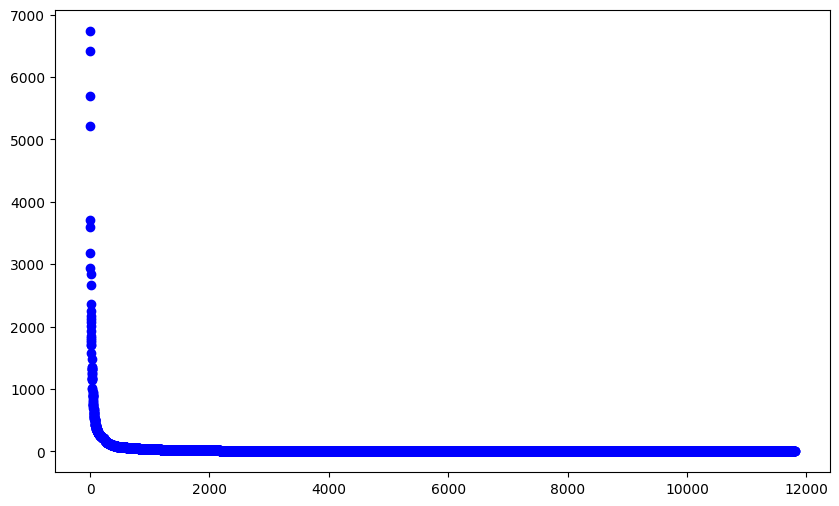

In [762]:
# Original data
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y)), y, color='b', label='Data')

# Fitted powerlaw
y_fit = [fit.power_law.pdf(i) for i in np.arange(1, len(y) + 1)]
plt.plot(np.arange(len(y)), y_fit, color='r', label='Fitted power law')

plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of Maximal Repetitions')
plt.xlabel('Rank order')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Which Are the properties of most common syllables

In [1760]:
# test on  hdbscan alphabet
x, y  = map(list, zip(*Counter(Counter(all_sequences.Seq_Syllables.explode().to_list())).most_common()))

In [1761]:
x

[5, 0, 3, -1, 2, 1, 7, 6, 4]

In [1643]:
# select per syllables
samples = specs_syllables_df.set_index('hdbscan_labels').loc[4].sample(n=10)

In [1721]:
# select per alphabet (and sort by most frequently used)
samples = specs_syllables_df.groupby('ms_labels').sample(n=1).set_index('ms_labels').loc[x]

In [1722]:
# plot sample specs for top three syllables

In [1723]:
import noisereduce as nr

thumb_specs = list(map(lambda x : compute_spec(x, pad_to = x.shape[0]), samples.audio))
label_specs = list(samples.index)

In [1949]:
label_specs

[1, 0, 4, 2, 3, 5, 6, 7, 8, 9, 10]

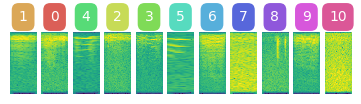

In [1725]:
plot_spectrograms(thumb_specs, 
                  label_specs, 
                  1, len(label_specs), # size of figure, 1 row 5 cols
                  color_dict = vocal_units_palette (np.arange(0, 11, 1 ))) # size of repertoire
                  
                  

In [1647]:
from IPython.display import Audio, display
#plt.plot(samples.loc[4].audio)
#Audio(data= samples.loc[4].audio, rate = 88200)

for i in range(samples.shape[0]):
    display(Audio(data= samples.iloc[i].audio, rate = 192000))

In [1663]:
# plot durations

specs_syllables_df['duration'] = specs_syllables_df['end_time'] - specs_syllables_df['start_time']

In [1681]:
specs_syllables_df.duration.max()

0.17749999999999994

In [1952]:
samples = specs_syllables_df.groupby('hdbscan_labels').sample(n=2000, replace=True)
samples['contextID'] = samples.context.apply(lambda x : context_dict_2ID[x])

Text(0.5, 1.0, "Distribution of sub-units' duration.\n(HDBSCAN Alphabet, All Bats)")

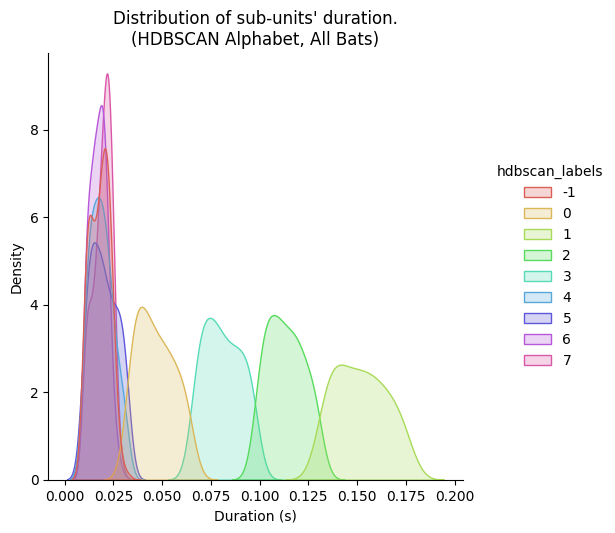

In [1954]:
import seaborn as sns
fig = sns.displot(samples, 
            x="duration", 
            hue="hdbscan_labels", 
            kind="kde", 
            fill=True, 
            bw_adjust = 2.,
            palette = vocal_units_palette (np.arange(-1, 8, 1 )))

fig.set(xlabel='Duration (s)')
fig.ax.set_title(f"Distribution of sub-units' duration.\n(HDBSCAN Alphabet, All Bats)")


Text(0.5, 1.0, 'Distribution of sub-units per context.\n(Mean-Shift Alphabet, All Bats)')

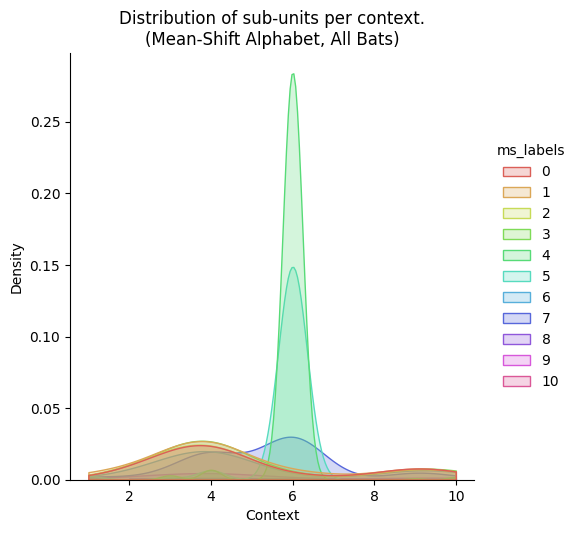

In [1955]:
import seaborn as sns
fig = sns.displot(samples, 
            x="contextID", 
            hue="ms_labels", 
            kind="kde", 
            fill=True, 
            bw_adjust = 2.,
            palette = vocal_units_palette (np.arange(0, 11, 1 )),
            cut = 0)

fig.set(xlabel='Context')
fig.ax.set_title(f"Distribution of sub-units per context.\n(Mean-Shift Alphabet, All Bats)")


In [1743]:
np.unique(tmp['labels'])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object)

In [1767]:
samples.context.apply(lambda x : context_dict_2ID[x])

16    4
3     6
16    6
5     6
5     6
     ..
1     6
2     6
1     6
2     6
5     6
Name: context, Length: 18000, dtype: int64

In [1746]:
tmp['duration'].max()

0.660984

/tmp/ipykernel_2744041/1237079277.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  fig = sns.displot(samples,


Text(0.5, 1.0, "Distribution of sub-units' duration.\n(Quantile t. ward Alphabet, Bat #215)")

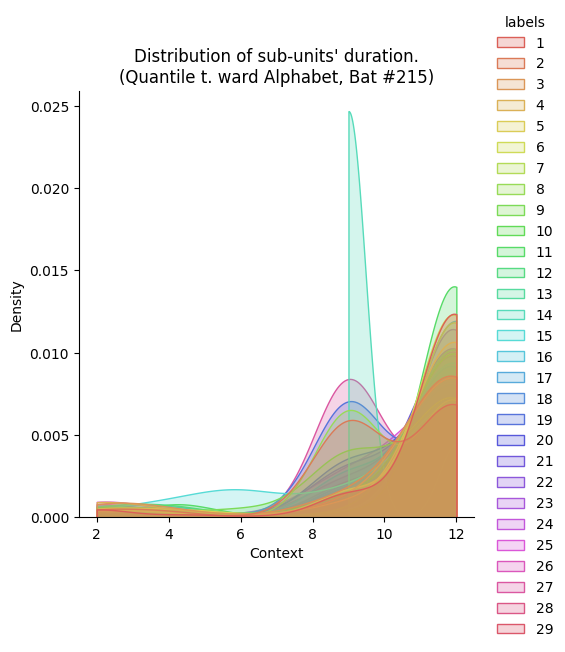

In [1756]:
# check for Bat215

tmp = pd.DataFrame()
tmp['labels'] = symbolic_sequences.Seq_Syllables.explode()
tmp['duration'] = symbolic_sequences.Duration.explode() / 250000
tmp['context'] = symbolic_sequences.context.explode() 


samples = tmp.groupby('labels').sample(n=2000, replace=True)

fig = sns.displot(samples, 
            x="context", 
            hue="labels", 
            kind="kde", 
            fill=True, 
            bw_adjust = 2.,
            cut=0,
            palette = vocal_units_palette (np.arange(1, 30, 1 )))

fig.set(xlabel='Context')
fig.ax.set_title(f"Distribution of sub-units' duration.\n(Quantile t. ward Alphabet, Bat #215)")


In [1750]:
tmp = pd.DataFrame()
tmp['labels'] = seq_mapped.syllableID_qt_ward
tmp['duration'] = seq_mapped.voc_segments_duration / 250000
tmp['context'] = seq_mapped.label_context
tmp['f0'] = seq_mapped.f0


,syllableID_qt_ward,syllableID_et_ward,commonSourceID,voc_segments,voc_segments_ix,voc_segments_duration,emitter,mfccs,mel_filtered,specs,...,temporal_stats,label_context,label_addressee,FileID,Folder,File name,Pos_segment,Start_seg,End_seg,Emitter
segmentID,,,,,,,,,,,,,,,,,,,,,
0,13,201,0,"[1.41432665e-05, -3.5728386e-05, 1.7758794e-05...","(61822.0, files201, 121004165931143478.WAV, 0,...",35952,215,"[[-740.9281, -738.7967, -738.887, -740.6574, -...","[[2.501173e-08, 6.530185e-08, 7.9928725e-08, 5...","[[1.5232453e-06, 6.4786386e-06, 3.016991e-06, ...",...,0.000277,6,217,61822.0,files201,121004165931143478.WAV,0,35795,71747,215
1,13,201,0,"[-1.3207282e-05, 2.4645447e-06, 1.3953331e-05,...","(61822.0, files201, 121004165931143478.WAV, 1,...",31246,215,"[[-797.1929, -794.71765, -794.62195, -795.7885...","[[4.221202e-08, 2.1270688e-08, 6.7097466e-10, ...","[[6.56751e-06, 3.4977363e-06, 1.5438059e-07, 2...",...,0.000243,6,217,61822.0,files201,121004165931143478.WAV,1,210795,242041,215
2,13,201,0,"[1.9119905e-05, 6.028393e-06, -1.15907515e-05,...","(61879.0, files201, 121004172433181482.WAV, 0,...",29746,215,"[[-759.7466, -756.56573, -755.2516, -755.7426,...","[[9.94251e-08, 5.289132e-08, 1.7610521e-08, 3....","[[1.5433186e-05, 7.1014897e-06, 6.916912e-07, ...",...,0.000244,6,217,61879.0,files201,121004172433181482.WAV,0,45141,74887,215
3,13,201,0,"[-3.0789045e-06, 3.3974366e-06, -3.8060898e-06...","(61879.0, files201, 121004172433181482.WAV, 1,...",28934,215,"[[-798.63324, -797.96655, -798.5516, -799.1408...","[[9.447878e-09, 5.0974474e-09, 7.7167783e-10, ...","[[1.396148e-06, 5.6756846e-07, 2.307436e-07, 2...",...,0.000216,6,217,61879.0,files201,121004172433181482.WAV,1,166141,195075,215
4,13,199,0,"[8.745383e-06, 2.2419135e-07, -9.993064e-06, 1...","(61882.0, files201, 121004172647137483.WAV, 0,...",27746,215,"[[-772.2091, -769.6285, -768.2542, -761.60425,...","[[3.2337162e-08, 1.2455747e-08, 1.3732987e-08,...","[[5.03222e-06, 3.059949e-06, 7.7808875e-07, 1....",...,0.000227,6,217,61882.0,files201,121004172647137483.WAV,0,34295,62041,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19544,27,376,0,"[-4.3459977e-06, 1.7754257e-07, 4.478548e-06, ...","(293184.0, files224, 140219055925290410.WAV, 2...",10612,215,"[[-798.8522, -798.4424, -799.38367, -800.0, -8...","[[1.9877374e-08, 9.914001e-09, 1.3031582e-13, ...","[[3.0337326e-06, 1.5130976e-06, 3.102174e-11, ...",...,0.000099,9,221,293184.0,files224,140219055925290410.WAV,2,151347,161959,215
19545,19,276,0,"[2.0383354e-06, -2.4169108e-06, 2.572534e-06, ...","(293184.0, files224, 140219055925290410.WAV, 3...",15246,215,"[[-799.98645, -798.5542, -797.7297, -797.47186...","[[5.8715535e-09, 2.9242249e-09, 1.7433099e-12,...","[[8.9609193e-07, 4.4648593e-07, 1.6491791e-10,...",...,0.000104,9,221,293184.0,files224,140219055925290410.WAV,3,188847,204093,215
19546,8,148,0,"[-1.1442537e-05, -1.6485361e-06, 4.191636e-06,...","(293184.0, files224, 140219055925290410.WAV, 4...",34967,215,"[[-790.35736, -774.5462, -754.98816, -745.9334...","[[9.019414e-08, 4.4780872e-08, 8.6568766e-11, ...","[[1.3724749e-05, 7.0441956e-06, 1.2092089e-08,...",...,0.000172,9,221,293184.0,files224,140219055925290410.WAV,4,227847,262814,215


## Common substrings

In [ ]:
def support_common_substring(tree):    
    tmp_k, tmp_l, tmp_p = None, None, None
    for k, length, path in tree.common_substrings():
        if tmp_p != path:
            #print('\n', tmp_p)
            print(f'Sub-sequence: [{path}] of length {length} found in at least {k} sequences')
            tmp_k = k
            tmp_l = length
            tmp_p = path
    else:
        print(f'\nTotal sequences: {k}')

#specs_syllables_dfsupport_common_substring(tree)

In [2098]:
specs_syllables_df.query(f'indv in {[str(215)]}');

In [2112]:
# using unique alphabet

#ALPHABET = 'hdbscan_labels'
ALPHABET = 'ms_labels'

for bat in list(filter(lambda x : x > 0, map(int, np.unique(specs_syllables_df.indv)))):

    print(f'\n\nBat #{bat}')
    all_sequences = pd.DataFrame()
    all_sequences['Seq_Syllables'] = specs_syllables_df.query(f'indv in {[str(bat)]}').groupby('key').apply(lambda x : x.sort_values(by = 'start_time')[ALPHABET].to_list())
    all_sequences['context'] = specs_syllables_df.query(f'indv in {[str(bat)]}').groupby('key').apply(lambda x : x.sort_values(by = 'start_time')['context'].to_list()[0])

    context_dict_2ID = {v: k for k, v in context_dict.items()  }  
    all_sequences['context_label'] = all_sequences['context']
    all_sequences['context'] = all_sequences['context'].apply(lambda x : context_dict_2ID[x])
    
    #tree  = Tree( symbolic_sequences.Seq_Syllables.to_dict() ) 
    tree  = Tree( all_sequences.Seq_Syllables.to_dict() ) 
    support_common_substring(tree)



Bat #101
Sub-sequence: [1 0 0 1] of length 4 found in at least 2 sequences
Sub-sequence: [1 2 0] of length 3 found in at least 3 sequences
Sub-sequence: [2 1] of length 2 found in at least 4 sequences
Sub-sequence: [0] of length 1 found in at least 10 sequences
Sub-sequence: [None] of length 0 found in at least 25 sequences

Total sequences: 46


Bat #102
Sub-sequence: [0 0 2 0] of length 4 found in at least 2 sequences
Sub-sequence: [1 1 1] of length 3 found in at least 3 sequences
Sub-sequence: [1 1] of length 2 found in at least 5 sequences
Sub-sequence: [0] of length 1 found in at least 12 sequences
Sub-sequence: [None] of length 0 found in at least 21 sequences

Total sequences: 32


Bat #103
Sub-sequence: [0] of length 1 found in at least 2 sequences

Total sequences: 3


Bat #105
Sub-sequence: [0 2] of length 2 found in at least 2 sequences
Sub-sequence: [0] of length 1 found in at least 3 sequences
Sub-sequence: [None] of length 0 found in at least 9 sequences

Total sequence

In [2035]:
#tree  = Tree( symbolic_sequences.Seq_Syllables.to_dict() ) 
    tree  = Tree( all_sequences.Seq_Syllables.to_dict() ) 
    support_common_substring(tree)

5948

In [2085]:
#samples = seq_mapped.set_index('syllableID_qt_ward').loc[6]['specs'].sample(n=2)
samples = [specs_syllables_df.set_index('hdbscan_labels').loc[0].audio.sample(n=1).values[0],
           specs_syllables_df.set_index('hdbscan_labels').loc[5].audio.sample(n=1).values[0]]

In [2075]:
samples

[array([ 0.00434457, -0.00770205, -0.00676719, ..., -0.043825  ,
        -0.02188135, -0.03148165], dtype=float32),
 array([0.01286621, 0.00100687, 0.008607  , ..., 0.02875641, 0.01869345,
        0.02309198], dtype=float32)]

In [2049]:
#seq_mapped.set_index('syllableID_qt_ward').loc[23].f0.apply(lambda x: np.unique([i for i in x if i!=0])).apply(np.median).dropna().hist()

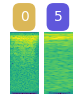

In [2086]:
import noisereduce as nr


thumb_specs = list(map(lambda x : compute_spec(x, pad_to = x.shape[0]), samples))
#label_specs = list(samples.index)

plot_spectrograms(thumb_specs, 
                  [0, 5], 
                  1, len(label_specs), # size of figure, 1 row 5 cols
                  color_dict = vocal_units_palette (np.arange(-1, 8, 1 ))) # size of repertoire
                  
                  

## Other

In [363]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# function to perform chi-square test
def chi_square_test(contingency_table):
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# get maximal repetitions for a specific context
context = 6
max_reps = max_repetition_by_context(context)

# convert to a list of strings for easier manipulation
max_reps_str = [' '.join(map(str, tup)) for tup in max_reps]

# create contingency table for composition vs permutation
composition_permutation_table = pd.crosstab(index=max_reps_str, columns=[np.sort(tup) for tup in max_reps])
chi2, p = chi_square_test(composition_permutation_table)
print(f"Chi-square statistic for composition vs permutation: {chi2}, p-value: {p}")

# create contingency table for syllable vs position
syllable_position_table = pd.DataFrame()
for i, seq in enumerate(max_reps_str):
    for j, syllable in enumerate(seq):
        syllable_position_table.loc[syllable, j] = syllable_position_table.get(j, {}).get(syllable, 0) + 1
chi2, p = chi_square_test(syllable_position_table)
print(f"Chi-square statistic for syllable vs position: {chi2}, p-value: {p}")


ValueError: All arrays must be of the same length

In [338]:
from bootstrapped import bootstrap as bs

ModuleNotFoundError: No module named 'bootstrapped'

In [2006]:
plot_and_play('121004165931143478.WAV')

NameError: name 'plot_and_play' is not defined

In [258]:
import itertools

# maximal repetitions that are not permuted

context = 2

n_grams_max_repeated = max_repetition_by_context(  context  )

combination_n_grams_max_repeated = []

not_combined  = []

for tup in n_grams_max_repeated:
    if len(tup) > 1:
        for group_comb in np.arange(2, len(tup)):
            for i in itertools.combinations(tup, group_comb):
                combination_n_grams_max_repeated.append(i)
                if i not in n_grams_max_repeated:
                    continue
                else:
                    not_combined.append( i )

for i in itertools.combinations(tup, len(tup)):
    combination_n_grams_max_repeated.append(i)


not_permuted = set(n_grams_max_repeated) \
    .difference( set(combination_n_grams_max_repeated)) 

not_permuted = set(filter(lambda x : len(np.unique(x)) > 1, not_permuted))


In [283]:
import itertools

# maximal repetitions that are not permuted
context = 2

n_grams_max_repeated = max_repetition_by_context(context)

not_permuted = []

for seq in n_grams_max_repeated:
    is_permuted = False
    for r in range(1, len(seq)):  # proper subsets only, hence we stop at len(seq)-1
        for subset in itertools.combinations(seq, r):  # get all combinations of length r
            for perm in itertools.permutations(subset):  # get all permutations of each combination
                if perm in n_grams_max_repeated:  # check if the permuted subset is in the original list
                    is_permuted = True
                    break
            if is_permuted:
                break
        if is_permuted:
            break
    if not is_permuted:
        not_permuted.append(seq)

# filter out sequences with all identical elements, as they can't form meaningful permutations
not_permuted = list(filter(lambda x : len(set(x)) > 1, not_permuted))

In [288]:
from itertools import permutations

not_permuted = []

for seq in n_grams_max_repeated:
    is_permuted = any(perm in n_grams_max_repeated for perm in permutations(seq))
    if not is_permuted:
        not_permuted.append(seq)

In [292]:
from itertools import permutations
from collections import Counter

not_permuted = []

n_grams_max_repeated_multisets = [Counter(seq) for seq in n_grams_max_repeated]

for seq, seq_multiset in zip(n_grams_max_repeated, n_grams_max_repeated_multisets):
    is_permuted = any(seq_multiset == Counter(perm) for perm in permutations(seq))
    if not is_permuted:
        not_permuted.append(seq)


In [306]:
not_permuted = []

for sequence in n_grams_max_repeated:
    if len(sequence) < 2:
        continue
        
    all_perms = list(itertools.permutations(sequence))
    # remove original sequence from all_perms
    all_perms.remove(sequence)
    # now check if any permuted sequence is in n_grams_max_repeated
    if not any(perm in n_grams_max_repeated for perm in all_perms):
        not_permuted.append(sequence)
        
print(len(not_permuted))


143


In [ ]:
n_grams_max_repeated

In [ ]:
n_grams_max_repeated

In [330]:
from collections import defaultdict
from scipy.stats import chi2_contingency

# Count syllables at each position
beginning_counts = defaultdict(int)
middle_counts = defaultdict(int)
end_counts = defaultdict(int)

#for sequence in n_grams_max_repeated:
for sequence in symbolic_sequences.query(f'context in [6]').Seq_Syllables.apply(lambda x : tuple(x) ).to_list():
    
    beginning_counts[sequence[0]] += 1
    end_counts[sequence[-1]] += 1
    for syllable in sequence[1:-1]:
        middle_counts[syllable] += 1

# Create a contingency table
syllables = set(beginning_counts) | set(middle_counts) | set(end_counts)
contingency_table = []

for syllable in syllables:
    contingency_table.append([
        beginning_counts[syllable],
        middle_counts[syllable],
        end_counts[syllable],
    ])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared Test Statistic:", chi2)
print("p-value:", p)

Chi-squared Test Statistic: 29.916847998981996
p-value: 0.2710702981556011


In [331]:
contingency_table

[[0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [5, 0, 7],
 [3, 0, 2],
 [0, 1, 0],
 [46, 14, 44],
 [15, 0, 16],
 [1, 0, 0],
 [0, 0, 3],
 [3, 2, 2],
 [1, 0, 1],
 [2, 1, 1],
 [0, 0, 1]]

In [ ]:
n_grams_max_repeated

In [ ]:
for t in n_grams_max_repeated:
    if len(t) == 2:
        print( (t[1], t[0]) in n_grams_max_repeated, list(permutations(t)))

<BarContainer object of 5 artists>

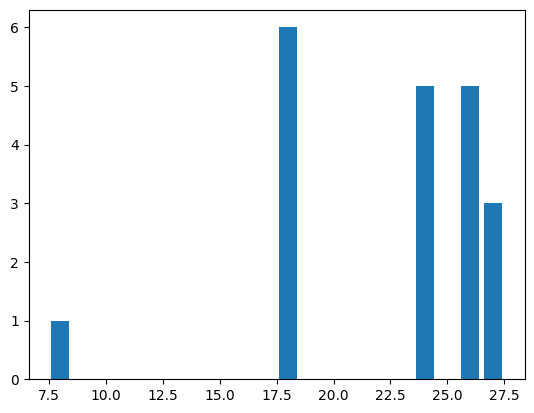

In [254]:
# first syllables of not permuted
first_prefix = dict()
for tup in not_combined:
    if tup[0] in first_prefix :
        first_prefix[ tup[0] ]  += 1
    else:
        first_prefix[ tup[0] ] = 0
        
first_prefix = collections.OrderedDict(sorted(first_prefix.items()))

plt.bar( first_prefix.keys(), first_prefix.values())

In [315]:
import itertools

# maximal repetitions that are not permuted

context = 9

n_grams_max_repeated = max_repetition_by_context(  context  )

permuted_n_grams_max_repeated = []

not_permuted  = []

n_grams_not_permuted = dict()


for tup in n_grams_max_repeated:
    if len(tup) > 1:
        perms = list(itertools.permutations(tup, len(tup)))
        max_perms = len(perms)
        for i in perms:
            permuted_n_grams_max_repeated.append(i)
            
            # if the permutation is found, continue
            if i in n_grams_max_repeated:
                continue
                
            # else, mark the sequence that did not have any permutation
            else:
                not_permuted.append( tup  )
                if tup in n_grams_not_permuted:
                    n_grams_not_permuted[ tup ] += 1/max_perms # normalize for max_nums of possible permutations to penalize long sequences
                else:
                    n_grams_not_permuted[ tup ] = 1/max_perms
            
#found_permuted = set(n_grams_max_repeated) \
#    .difference( set(permuted_n_grams_max_repeated)) 

#not_permuted = set(filter(lambda x : len(np.unique(x)) > 1, not_permuted))


In [322]:
# prefix


# count how many times a syllable is found in non permuted subsequences, and weights for the normalized number of those sequences
syl_counter = dict()

for syl, num in pd.Series(n_grams_not_permuted.keys()).explode().value_counts().to_dict().items():
    
    for tup in n_grams_not_permuted:
        
        if syl in tup:
            if syl in syl_counter:
                syl_counter[ syl ] += n_grams_not_permuted[ tup ]
            else:
                syl_counter[ syl ] = n_grams_not_permuted[ tup ]
            
    syl_counter[ syl ] /= num

NameError: name 'annotations' is not defined

<BarContainer object of 26 artists>

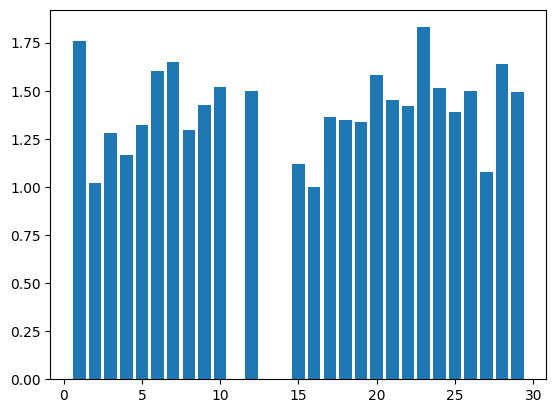

In [324]:
plt.bar( syl_counter.keys(), syl_counter.values())

In [313]:
pd.Series(n_grams_not_permuted.keys()).explode().value_counts().to_dict().items()

dict_items([(2, 320), (27, 281), (19, 204), (18, 192), (8, 126), (22, 84), (20, 70), (29, 69), (26, 63), (24, 58), (9, 50), (21, 25), (25, 24), (3, 23), (23, 22), (28, 22), (7, 20), (6, 15), (17, 15), (5, 12), (1, 9), (10, 8), (15, 7), (12, 5), (4, 3), (16, 1)])

In [289]:
# first syllables of not permuted
first_prefix = dict()
for tup in not_permuted:
    if tup[0] in first_prefix :
        first_prefix[ tup[0] ]  += 1
    else:
        first_prefix[ tup[0] ] = 0

In [290]:
len(set(not_permuted))

540

<BarContainer object of 26 artists>

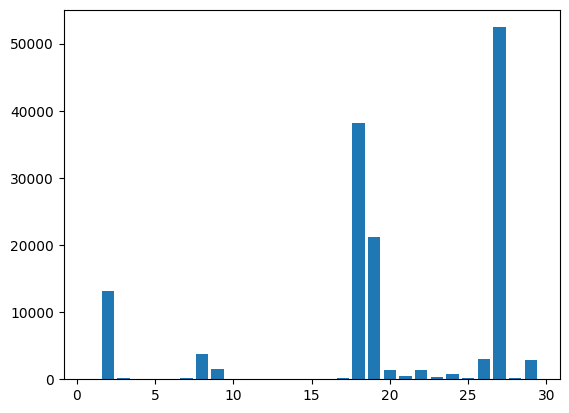

In [291]:
# count how many times a syllable is found in non-permutated subsequences

#not_permuted = list(set(not_permuted))

syl_counter = pd.Series(not_permuted).explode().value_counts().to_dict()
syl_counter = collections.OrderedDict(sorted(syl_counter.items()))
plt.bar( syl_counter.keys(), syl_counter.values())

In [251]:
first_prefix = collections.OrderedDict(sorted(first_prefix.items()))

<BarContainer object of 24 artists>

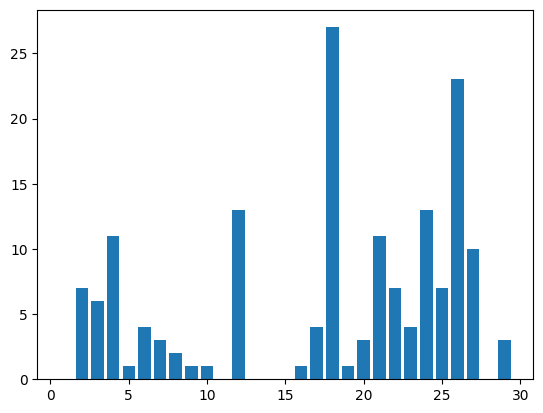

In [252]:
plt.bar( first_prefix.keys(), first_prefix.values())

<BarContainer object of 29 artists>

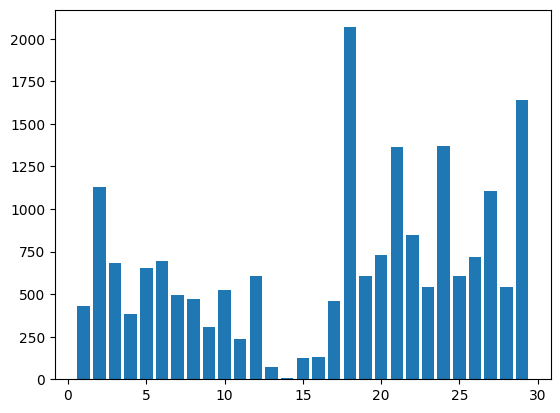

In [271]:
sorted_syllables = symbolic_sequences.Seq_Syllables.explode().value_counts().to_dict()

sorted_syllables = collections.OrderedDict(sorted(sorted_syllables.items()))

plt.bar( sorted_syllables.keys(), sorted_syllables.values())

In [67]:
# maximal repetitions that are not permuted

context = 3

bigrams_max_repeated = list(filter(lambda x: len(x) == 2 , max_repetition_by_context(  context  )))

permuted_bigrams_max_repeated = [(i[1],i[0]) for i in bigrams_max_repeated]


not_permuted = set(bigrams_max_repeated) \
    .difference( set(permuted_bigrams_max_repeated))


In [68]:
max_repetition_by_context(6);

In [2113]:
pwd

'/data0/home/h21/luas6629/Thesis/data/syllable_dfs/fruitbat_segmented'

In [69]:
total_not_permuted = 0
for tup in not_permuted :
    total_not_permuted += collections.Counter(bigrams_max_repeated).get( tup )
    print(f'{tup} : {collections.Counter(bigrams_max_repeated).get( tup ) } ')

(9, 3) : 2 
(18, 20) : 3 
(22, 20) : 2 
(24, 29) : 2 
(18, 2) : 2 
(29, 18) : 2 
(3, 2) : 2 
(18, 24) : 2 
(27, 18) : 2 


In [70]:
len(not_permuted) / len(set(bigrams_max_repeated)) 

0.75

In [71]:
total_not_permuted / len(bigrams_max_repeated)

0.7307692307692307

In [53]:
len(set(permuted_bigrams_max_repeated))

2

In [917]:
mr_c_9 = pd.DataFrame(max_repetition_by_context(9), columns = ['frequency', 'maximal_repetition'])
mr_c_9['context'] = 9

In [918]:
mr_c_2 = pd.DataFrame(max_repetition_by_context(2), columns = ['frequency', 'maximal_repetition'])
mr_c_2['context'] = 2

In [969]:
len(Y)

7220

In [1015]:
for i in range(2, 13):
    print('context', context_dict[i])
    X = max_repetition_by_context(9) + max_repetition_by_context( i )
    Y = [9 for _ in range(len(max_repetition_by_context(9)))] + [i for _ in range(len(max_repetition_by_context(i)))] 

    X = [' '.join([str(i) for i in x]) for x in X]

    cm = pd.crosstab(index=X, columns=Y, margins=True)
    
    obs = cm.iloc[:-1, :-1]
    res = chi2_contingency(obs, lambda_="log-likelihood")
    print(res.pvalue)

context Biting
1.0
context Feeding
1.0
context Fighting
1.0
context Grooming
1.0
context Isolation
1.0
context Kissing
1.0
context Landing
1.0
context Mating protest
1.0
context Threat-like
1.0
context General
0.9968726731866752
context Sleeping
0.40432492783601676


In [ ]:
max_repetition_by_context(9)

In [992]:
obs = cm.iloc[:-1, :-1]
res = chi2_contingency(obs, lambda_="log-likelihood")
res.pvalue

0.0

In [998]:
cm

col_0,9,12,All
row_0,,,
1,32,277,309
1 1,0,29,29
1 1 1,0,4,4
1 1 24,0,2,2
1 1 28,0,2,2
...,...,...,...
9 8 2,3,0,3
9 8 8,3,0,3
9 9,4,6,10


In [985]:
# pair-wise G-test against maximum repetitions

max_repetition_by_context(1)

[]

In [ ]:
set([seq for f, seq in max_repetition_by_context(9)]) \
    .intersection(  set([seq for f, seq in max_repetition_by_context(2)]))
                                                                   
                                                                   

In [ ]:
data

In [875]:
# Syllables in maximal repeats

In [1771]:
all_sequences

,Seq_Syllables,context,context_label
key,,,
120601002132055008,"[5, 2]",9,Mating protest
120601044742952687,"[2, 5]",3,Feeding
120601063000749337,"[5, 0, 0, 0, 2, 3]",4,Fighting
120601121832923352,"[-1, -1, -1]",6,Isolation
120602185932558467,"[3, 5, 0, 5, 5, 0, 5]",3,Feeding
...,...,...,...
140219055915824409,"[3, 0, 0, 0, 2, 1, 2, 1, 0, 5, 0, 5, 3, 0, 2, ...",9,Mating protest
140219055925290410,"[3, 5, 3, 0, 0, 1, 3, 3, 5, 5, 5]",9,Mating protest
140219102444234429,"[3, 2, 0, 0, 3]",4,Fighting


In [1795]:
data = []

# all sequences, any context
tree = Tree( all_sequences.Seq_Syllables.to_dict() ) 


for C, path in sorted(tree.maximal_repeats()):
    #print(C, path.__str__().split())
    
    path = np.array(list( map(int, path.__str__().split()) ))
    #print(path)
    if len(np.unique(path)) < 2 and len(path) > 2:
        #print(C, path)
        
        data.append((C, tuple(path)))

length_counts = [len(i[1]) for i in data]

syl_counts = dict()

for freq, seq in data:
    # insert first syllables  and append C frequencies
    syl_counts.setdefault(seq[0],[]).append((len(seq), freq ))
    
for k, v in syl_counts.items():
    syl_counts[k] = sorted(v)
    
syl_counts =  collections.OrderedDict(sorted(syl_counts.items()))


# Make sure syl_counts[k] is in the same order as length_counts
for k in syl_counts.keys():
    counts_dict = {length: count for length, count in syl_counts[k]}
    syl_counts[k] = [counts_dict.get(length, 0) for length in length_counts]

# Make sure syl_counts[k] is numpy array for correct stacking
for k in syl_counts.keys():
    syl_counts[k] = np.array(syl_counts[k])

    



In [1812]:
c = 5
context_dict[c], pd.Series(max_repetition_by_context(c, all_sequences)).apply(len).describe()

('Grooming',
 count    3120.000000
 mean        2.583333
 std         1.348093
 min         1.000000
 25%         1.000000
 50%         2.000000
 75%         3.000000
 max         7.000000
 dtype: float64)

In [1796]:
syl_counts;

In [1797]:
syl_counts.items(), length_counts;

len(length_counts), len(syl_counts.items())

(112, 9)

In [1790]:
length_counts;

In [1779]:
syl_counts.items()

odict_items([(1, array([5, 0, 0, 0])), (2, array([30, 11,  3,  0])), (3, array([4, 0, 0, 0])), (5, array([5, 0, 0, 0])), (6, array([2, 0, 0, 0])), (7, array([3, 0, 0, 0])), (8, array([5, 0, 0, 0])), (11, array([10,  4,  2,  0])), (12, array([16,  0,  0,  0])), (13, array([7, 2, 1, 1])), (16, array([2, 0, 0, 0])), (17, array([6, 0, 0, 0])), (18, array([47, 10,  0,  0])), (19, array([4, 0, 0, 0])), (23, array([2, 0, 0, 0])), (24, array([4, 0, 0, 0])), (27, array([23,  7,  2,  0])), (29, array([8, 0, 0, 0]))])

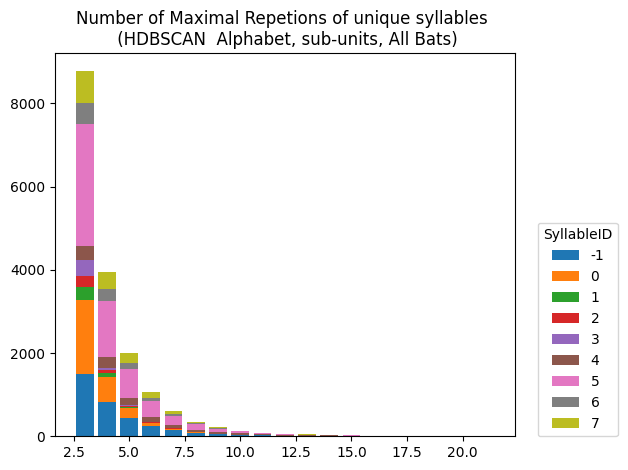

In [1798]:
fig, ax = plt.subplots()
bottom = np.zeros(len(length_counts))

for ix, syl_count in syl_counts.items():
    width = len(syl_count) 
    p = ax.bar(length_counts, syl_count, label=ix, bottom=bottom)
    bottom += syl_count

ax.set_title(f"Number of Maximal Repetions of unique syllables \n (HDBSCAN  Alphabet, sub-units, All Bats)")
ax.legend(title = 'SyllableID', loc=(1.05, 0))
plt.tight_layout()
plt.show()

In [56]:
# BAT 215 Longest repeat is syl 13, most frequent repeat is 18

def plot_spec(spec, ax = None):
    S_db = librosa.power_to_db(spec**2, ref=np.max)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax = ax) 
    #plt.imshow(S_db)
    

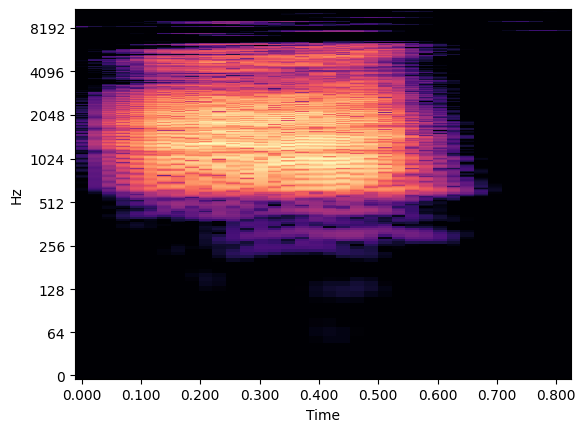

In [266]:
plot_spec(seq_mapped.query(f'syllableID_qt_ward in [18]').specs.sample().values[0])

In [262]:
from IPython.display import Audio, display

Audio( seq_mapped.query(f'syllableID_qt_ward in [18]').sample().voc_segments.values[0], rate = 88200)

In [805]:
seq_mapped.query(f'syllableID_qt_ward in [18]').sample().voc_segments.values[0]

array([ 2.6313903e-05, -4.8730064e-05,  8.4031544e-06, ...,
        5.3995143e-05, -5.5970741e-05,  4.9074391e-05], dtype=float32)

In [775]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [1958]:
def support_common_substring(tree):    
    tmp_k, tmp_l, tmp_p = None, None, None
    for k, length, path in tree.common_substrings():
        if tmp_p != path:
            #print('\n', tmp_p)
            print(f'Sub-sequence: [{path}] of length {length} found in at least {k} sequences')
            tmp_k = k
            tmp_l = length
            tmp_p = path
    else:
        print(f'\nTotal sequences: {k}')

support_common_substring(tree)

Sub-sequence: [0 0 0 5 0 0 0 5 5 0 0 0 0 0 0 0 0 0 5 0 5] of length 21 found in at least 2 sequences
Sub-sequence: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] of length 20 found in at least 3 sequences
Sub-sequence: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] of length 19 found in at least 4 sequences
Sub-sequence: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] of length 18 found in at least 5 sequences
Sub-sequence: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] of length 17 found in at least 6 sequences
Sub-sequence: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5] of length 15 found in at least 7 sequences
Sub-sequence: [5 5 5 5 5 5 5 5 5 5 5 5 5 5] of length 14 found in at least 9 sequences
Sub-sequence: [5 5 5 5 5 5 5 5 5 5 5 5 5] of length 13 found in at least 13 sequences
Sub-sequence: [5 5 5 5 5 5 5 5 5 5 5 5] of length 12 found in at least 15 sequences
Sub-sequence: [5 5 5 5 5 5 5 5 5 5 5] of length 11 found in at least 18 sequences
Sub-sequence:

In [1957]:
len(tree)

TypeError: object of type 'Tree' has no len()

# G-Test

In [490]:
X = symbolic_sequences.Seq_Syllables.explode().tolist()
Y = symbolic_sequences.label_context.explode().tolist()


cm = pd.crosstab(index=X, columns=Y, margins=True)

#tmp = cm.loc[1].replace(0, np.nan).dropna(how='all', axis=0)

#G = 2 * sum(tmp[:-1]  * np.log(tmp[:-1] / tmp['All']))


cm

col_0,2,3,4,5,6,7,8,9,10,11,12,All
row_0,,,,,,,,,,,,
1,15,0,4,4,0,2,0,34,1,38,332,430
2,24,11,21,5,0,10,0,475,8,54,519,1127
3,28,21,15,6,0,8,0,69,6,77,455,685
4,28,4,3,4,0,1,0,20,4,37,285,386
5,21,10,14,9,1,8,0,37,4,58,491,653
6,16,7,10,2,1,5,0,58,4,79,512,694
7,12,5,10,2,1,3,0,48,5,44,364,494
8,9,1,12,1,0,1,0,207,2,31,207,471
9,10,4,3,2,8,4,0,92,0,24,161,308


In [461]:
X = symbolic_sequences.Seq_Syllables.apply(lambda x : ' '.join([i for i in map(str,x)])).tolist()
Y = symbolic_sequences.label_context.apply(lambda x : collections.Counter(x).most_common()[0][0])

cm = pd.crosstab(index=X, columns=Y, margins=True)


In [475]:
symbolic_sequences[symbolic_sequences.Seq_Syllables.apply(lambda x : is_sublist(x, [18, 18, 27, 19, 27, 18, 27]))]

,File name,Seq_Syllables,Seq_Syllables_ix,Pos_Segment,Duration,Folder,FileID,Emitter,label_addressee,label_context
6027,140218045916674772.WAV,"[18, 18, 27, 19, 27, 18, 27, 8, 2, 2, 8, 15, 8...","[18568, 18569, 18570, 18571, 18572, 18573, 185...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[12997, 5624, 14246, 11246, 15246, 9545, 19172...",files224,292527,[215],"[221, 221, 221, 221, 221, 221, 221, 221, 221, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
6061,140219045413526242.WAV,"[5, 15, 27, 27, 8, 2, 19, 8, 2, 20, 8, 26, 26,...","[19133, 19134, 19135, 19136, 19137, 19138, 191...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[32861, 53472, 21246, 25440, 47548, 53179, 101...",files224,293073,[215],"[221, 221, 221, 221, 221, 221, 221, 221, 221, ...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."


In [487]:
from scipy.stats import chi2_contingency

obs = cm.iloc[:-1,:-1]

In [488]:
obs

col_0,2,3,4,5,6,7,8,9,10,11,12
row_0,,,,,,,,,,,
1,15,0,4,4,0,2,0,34,1,38,332
2,24,11,21,5,0,10,0,475,8,54,519
3,28,21,15,6,0,8,0,69,6,77,455
4,28,4,3,4,0,1,0,20,4,37,285
5,21,10,14,9,1,8,0,37,4,58,491
6,16,7,10,2,1,5,0,58,4,79,512
7,12,5,10,2,1,3,0,48,5,44,364
8,9,1,12,1,0,1,0,207,2,31,207
9,10,4,3,2,8,4,0,92,0,24,161


In [506]:
cm.iloc[:-1, 7:-1]

col_0,9,10,11,12
row_0,,,,
1,34,1,38,332
2,475,8,54,519
3,69,6,77,455
4,20,4,37,285
5,37,4,58,491
6,58,4,79,512
7,48,5,44,364
8,207,2,31,207
9,92,0,24,161


In [505]:
# G-Test

obs = cm.iloc[:-1, 7:-1]

res = chi2_contingency(obs, lambda_="log-likelihood")

ValueError: The internally computed table of expected frequencies has a zero element at (12, 0).

In [503]:
res.statistic

2216.945276303131

In [504]:
res.pvalue

0.0

In [407]:
res.dof

280

In [337]:
seq_mapped.groupby('syllableID_qt_ward')['voc_segments_duration'].std()

syllableID_qt_ward
1      8569.239548
2      9870.244134
3      6920.633989
4      6083.865762
5      6435.547980
6      7515.066987
7      7970.851142
8      9819.960493
9     10005.586110
10     7824.847079
11     6975.549558
12     7735.895522
13     6467.410210
14    63897.302073
15    14644.368473
16    10296.229338
17     9761.482216
18     3062.490511
19     4151.300274
20     5685.997899
21     6508.931121
22     5465.631502
23     6782.733803
24     5573.152469
25     5211.499172
26     5643.942124
27     5073.380989
28     4604.637055
29     4162.840768
Name: voc_segments_duration, dtype: float64

In [327]:
seq_mapped.voc_segments_duration

segmentID
0        35952
1        31246
2        29746
3        28934
4        27746
         ...  
19544    10612
19545    15246
19546    34967
19547    20493
19548    23034
Name: voc_segments_duration, Length: 19549, dtype: object

In [364]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

seq_mapped.set_index('syllableID_qt_ward') \
    .f0.apply(lambda x : np.median( [item for item in x if item != 0  ])) \
    .groupby('syllableID_qt_ward').describe()

/data0/home/h21/luas6629/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,count,mean,std,min,25%,50%,75%,max
syllableID_qt_ward,,,,,,,,
1,424.0,3607.237730,4676.628887,244.810709,676.614143,1827.331743,5335.376166,41828.235603
2,1126.0,4326.552504,6372.855090,244.810709,716.847714,1475.730528,5555.525003,85611.848529
3,683.0,4021.722464,4925.534812,244.810709,913.665871,1233.768660,5444.633128,40872.877381
4,380.0,4051.047784,5962.826958,244.810709,944.524253,1174.661102,5444.269830,50611.917842
5,642.0,4587.516395,5041.560417,244.810709,918.958684,3020.448188,6770.800510,47222.589112
6,685.0,3190.952475,4643.382480,244.810709,786.256479,1255.334557,3469.525985,50611.917842
7,493.0,3709.516021,4627.704378,244.810709,833.009722,1870.043598,4685.074227,45090.092728
8,471.0,4050.747288,5883.185533,244.810709,708.614015,1124.854633,5109.194905,44315.471924
9,307.0,5359.679811,6499.614703,244.810709,994.887491,3037.894787,8228.206049,63767.020665


# CRF

In [25]:
from itertools import chain
#import nltk
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import sklearn
import pycrfsuite

In [129]:
def compute_kmers(sequence, k):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        kmers.append(kmer)
    return kmers

def jaccard_similarity(a, b):
    a = set(a)
    b = set(b)

    intersection = len(a.intersection(b))
    union = len(a.union(b))

    return intersection / union

def jaccard_containment(a, b):
    a = set(a)
    b = set(b)

    intersection = len(a.intersection(b))

    return intersection / len(a)

def split_tuples(df):
    """
    Function to split columns containing tuples independently in a DataFrame.
    """
    new_df = pd.DataFrame()  # Create a new DataFrame to store the split columns
    
    # Iterate over the columns of the original DataFrame
    for column in df.columns:
        new_columns = [f"{column}_{i+1}" for i in range(len(df[column][0]))]  # Generate new column names
        
        # Split the tuples into separate columns using the apply function
        split_data = df[column].apply(pd.Series)
        split_data.columns = new_columns
        
        # Concatenate the split columns to the new DataFrame
        new_df = pd.concat([new_df, split_data], axis=1)
    
    return new_df


In [130]:
symbolic_sequences['context'] = symbolic_sequences['label_context'].apply(lambda x : x[0])

In [180]:
data_df = symbolic_sequences.query(f'context not in {[8]}')

In [181]:
import itertools
import math


def mean_jaccards(sequence, k):
    
    x = compute_kmers(sequence, k)
    
    
    j_similarity = []
    j_containment = []
    
    for a, b in itertools.pairwise( x ):
        j_similarity.append( jaccard_similarity(a, b) )
        j_containment.append( jaccard_containment(a, b) )
        
    return np.mean(j_similarity), np.mean( j_containment)
        
     

mean_jaccards([4, 12, 12, 2, 6, 1], 3)

(0.5, 0.7222222222222222)

In [182]:
j_df = pd.DataFrame()

j_df[2] = data_df['Seq_Syllables'].apply(lambda x : mean_jaccards(x,  2))
j_df[3] = data_df['Seq_Syllables'].apply(lambda x : mean_jaccards(x,  3))
j_df[4] = data_df['Seq_Syllables'].apply(lambda x : mean_jaccards(x,  4))
j_df[5] = data_df['Seq_Syllables'].apply(lambda x : mean_jaccards(x,  5))

j_df = split_tuples(j_df).fillna(0)

/home/h21/luas6629/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/h21/luas6629/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/h21/luas6629/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/h21/luas6629/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [183]:
X = j_df
y = data_df['context']

In [184]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



_RANDOM_STATE = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state= _RANDOM_STATE )


In [185]:
X_train

,2_1,2_2,3_1,3_2,4_1,4_2,5_1,5_2
741,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0
2155,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0
4696,0.333333,0.500000,0.0,0.00,0.000000,0.0,0.0,0.0
2271,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0
4157,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6013,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0
2173,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0
6049,0.666667,0.833333,0.5,0.75,0.333333,0.5,0.0,0.0
5571,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0


In [186]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=_RANDOM_STATE, n_jobs=-1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Precision: %.2f' % precision_score(y_test, y_pred, average = 'micro'))
print('Recall: %.2f' % recall_score(y_test, y_pred, average = 'micro'))
print('F1-micro: %.2f' % f1_score(y_test, y_pred, average = 'micro'))
print('F1-weighted: %.2f' % f1_score(y_test, y_pred, average = 'weighted'))

Misclassified samples: 485
Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1-micro: 0.68
F1-weighted: 0.56


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test,
                            y_pred,
                            digits=2, 
                            target_names= [context_dict[i] for i in [2,3,4,5,6,7,9,10,11, 12]]
                           )
     )

from sklearn.metrics import confusion_matrix

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

print(cm)

                precision    recall  f1-score   support

        Biting       0.00      0.00      0.00        73
       Feeding       0.00      0.00      0.00        24
      Fighting       0.00      0.00      0.00        12
      Grooming       0.00      0.00      0.00        12
     Isolation       0.00      0.00      0.00        19
       Kissing       0.00      0.00      0.00        12
Mating protest       0.44      0.05      0.09       157
   Threat-like       0.00      0.00      0.00        12
       General       0.00      0.00      0.00       157
      Sleeping       0.69      0.99      0.81      1042

      accuracy                           0.68      1520
     macro avg       0.11      0.10      0.09      1520
  weighted avg       0.52      0.68      0.56      1520

[[   0    0    0    0    0    0    1    0    0   72]
 [   0    0    0    0    0    0    0    0    0   24]
 [   0    0    0    0    0    0    0    0    0   12]
 [   0    0    0    0    0    0    0    0    0   12]
 

/home/h21/luas6629/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h21/luas6629/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h21/luas6629/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Blackboard

Apriori is conceptually wrong, since they are sets

In [145]:
symbolic_sequences[symbolic_sequences.Seq_Syllables.apply(lambda x : x.count(29)> 20)]

,File name,Seq_Syllables,Seq_Syllables_ix,Pos_Segment,Duration,Folder,FileID,Emitter,label_addressee,label_context


In [139]:
subfinder([29, 29], [29, 28121])

[29, 29]

In [247]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

def apply_apriori(data, min_support, min_threshold):
    transaction_list = []
    
    for item in data:
        C = item[0]
        path = item[1].__str__().split() # convert the path obj into a list
        transaction_list.extend(path)
    
    # one hot encoding
    te = TransactionEncoder()
    te_ary = te.fit(transaction_list).transform(transaction_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    association_rules_df = association_rules(frequent_itemsets, metric="support", min_threshold=min_threshold)
    
    return association_rules_df

In [254]:
apply_apriori(tree.maximal_repeats(),0.001, .0001);

In [257]:
transaction_list = symbolic_sequences.Seq_Syllables.to_list()

# one hot encoding
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

apriori(df, min_support=.01, use_colnames=True)


,support,itemsets
0,0.058891,(1)
1,0.103635,(2)
2,0.096397,(3)
3,0.059056,(4)
4,0.094917,(5)
...,...,...
281,0.010035,"(26, 18, 27)"
282,0.013818,"(18, 27, 29)"
283,0.010199,"(18, 28, 29)"
284,0.011186,"(27, 19, 22)"


In [259]:
freq_itemsets = apriori(df, min_support=.01, use_colnames=True)


association_rules(freq_itemsets, support_only=True, min_threshold=0.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),(2),NaN,NaN,0.016286,NaN,NaN,NaN,NaN,NaN
1,(2),(1),NaN,NaN,0.016286,NaN,NaN,NaN,NaN,NaN
2,(1),(3),NaN,NaN,0.013654,NaN,NaN,NaN,NaN,NaN
3,(3),(1),NaN,NaN,0.013654,NaN,NaN,NaN,NaN,NaN
4,(1),(7),NaN,NaN,0.012667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
765,"(24, 21)",(29),NaN,NaN,0.011351,NaN,NaN,NaN,NaN,NaN
766,"(21, 29)",(24),NaN,NaN,0.011351,NaN,NaN,NaN,NaN,NaN
767,(24),"(21, 29)",NaN,NaN,0.011351,NaN,NaN,NaN,NaN,NaN
768,(29),"(24, 21)",NaN,NaN,0.011351,NaN,NaN,NaN,NaN,NaN


In [ ]:
transaction_list

In [234]:
from prefixspan import PrefixSpan

ps = PrefixSpan(symbolic_sequences.Seq_Syllables.to_list())

In [240]:
print(ps.frequent(2, generator=True))

KeyboardInterrupt: 

In [239]:
print(ps.topk(5,generator=True))

[(1387, [29]), (1378, [18]), (1241, [21]), (1182, [24]), (746, [22])]
